# Inferencia Estadística 1

La inferencia estadística esta fuertemente arraigada en probabilidad. En este notebook podrán encontrar los principios de las pruebas de hipótesis (base de la inferencia estadística).

Para abrirlo en Google colab:  <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase5_InferenciaEstadistica_I.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [1]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q # Para datasets de R
!pip install kagglehub -q # permite descargar datos desde kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 11.6 MB/s eta 0:00:00


## Set de Datos

En esta clase se utlizará el Set de Datos de bienes raíces de Ames en Iowa, USA.
Para descargar el set de datos se debe correr la siguiente celda:

In [2]:

import kagglehub
import os
import shutil
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("marcopale/housing") # descargamos el set de datos
datos = pd.read_csv(path+'/AmesHousing.csv')[['PID', 'Lot Area', 'SalePrice']]
datos.head()

100%|██████████| 397k/397k [00:00<00:00, 20.2MB/s]

Extracting files...


,PID,Lot Area,SalePrice
0,526301100,31770,215000
1,526350040,11622,105000
2,526351010,14267,172000
3,526353030,11160,244000
4,527105010,13830,189900


Para poder ver que tipos de datos se encuentran en el set de datos. Se pueden utilizar las siguientes funciones:

In [3]:
print('Número de Columnas', datos.shape[1])
print('Número de Filas', datos.shape[0])
datos.head()

Número de Columnas 3
Número de Filas 2930


,PID,Lot Area,SalePrice
0,526301100,31770,215000
1,526350040,11622,105000
2,526351010,14267,172000
3,526353030,11160,244000
4,527105010,13830,189900


El set de datos tiene 82 columnas, que describen diferentes características de las viviendas, y 2930 vividendas diferentes.

Para más información pueden referirse a: https://www.kaggle.com/datasets/marcopale/housing

## Variabilidad en Estimadores

En esta instancia, las variables que nos van a interesar para cada casa son:
- PID: Parcel Identification Number o el ID de la casa
- Lot Area: El área de la casa
- SalePrice: Precio de venta de la casa

Utilizando `Pandas`, se puede extraer solamente estas columnas de forma de facilitar el manejo de los datos.

Existen diferentes formas de poder extraer o seleccionar datos desde un dataframe de `Pandas`. Un ejemplo es loc, iloc y at, pero pueden ver más en [Documentación de Pandas](https://pandas.pydata.org/docs/user_guide/indexing.html).

### Estimaciones Puntuales y Muestrales

Es posible extraer muestras desde los datos, y a partir de estos calcular estimadores muestrales.

A partir de esto podemos calcular descriptores los cuales se definen como **estimaciones puntuales**, esta corresponde a un valor único de calculado desde nuestra muestra y busca representar el valor respectivo en la población. Por ejemplo, al calcular el promedio de nuestra muestra ($\overline{x}$), este representa el promedio poblacional ($\mu$).


In [4]:
### Para graficar histogramas con descriptores de la población
def histogram_described(data, mean = True, median = True, mode = True, ejex = None, ejey = None, titulo = None,
                        density = True, hist_color = 'tab:purple'):
    """
    Función que permite obtener un histograma de los datos y mostrar medidas de tendencia central
    ---
    Parameters

    data: pd.Series or np.array
        Serie de datos
    mean: bool
        Indica si se quiere mostrar la media
    median: bool
        Indica si se quiere mostrar la mediana
    mode: bool
        Indica si se quiere mostrar la moda
    ---
    return: None

    """
    # generamos la figura
    fig, ax = plt.subplots(figsize = (7.5,4), dpi = 300)
    # generamos el histograma
    n_bins = np.sqrt(len(data)).astype(int)
    ax.hist(data, bins=n_bins, alpha=0.75, color=hist_color, density=density, edgecolor = 'white')
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax.axvline(data.mean(), color='r', linestyle='dashed', linewidth=2 , label = f'Media = {data.mean():.2f}')
    # mediana
    if median:
        ax.axvline(data.median(), color='lime', linestyle='dashed', linewidth=2, label = f'Mediana = {data.median():.2f}')
    # moda
    if mode:
        ax.axvline(data.mode()[0], color='tab:blue', linestyle='dashed', linewidth=2, label = f'Moda = {data.mode():.2f}')
    ax.legend(loc='upper right')
    # ejes
    ax.set_xticklabels(ax.get_xticklabels(),fontsize = 12)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize = 12)
    ax.set_xlabel(ejex, fontsize = 12)
    ax.set_ylabel(ejey, fontsize = 12)

    if ejex:
        ax.set_xlabel(ejex)
    if ejey:
        ax.set_ylabel(ejey)
    # titulo
    if titulo:
        ax.set_title(titulo)
    plt.show()

<ipython-input-4-52c072c7ac8a>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = 12)
<ipython-input-4-52c072c7ac8a>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize = 12)


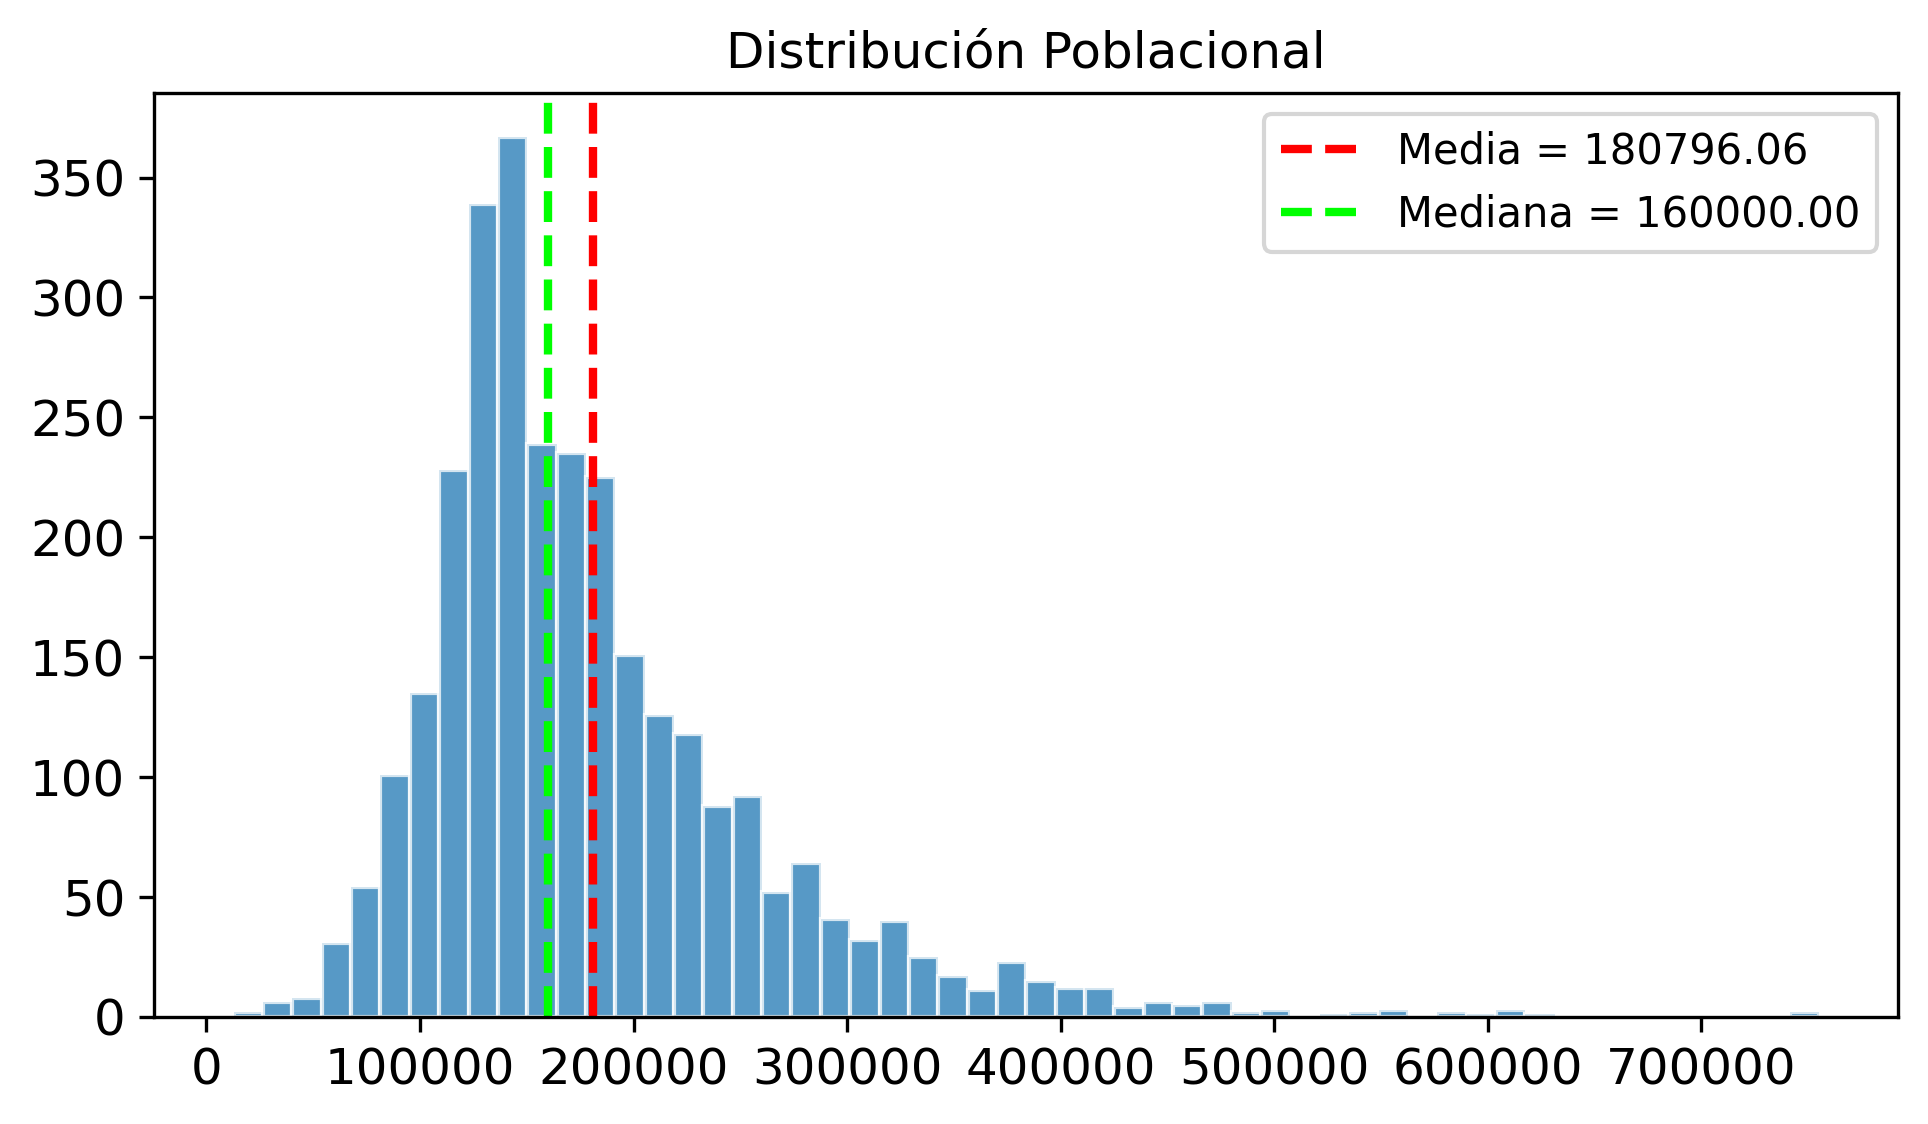

In [5]:
import numpy as np
import matplotlib.pyplot as plt

prices_df = datos['SalePrice'] # Extraemos los datos de precios
histogram_described(prices_df, mode = False, density=False, titulo='Distribución Poblacional', hist_color = 'tab:blue')

Luego, para datos muestrales, es necesario extraer muestras de la población original.

<ipython-input-4-52c072c7ac8a>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = 12)
<ipython-input-4-52c072c7ac8a>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize = 12)


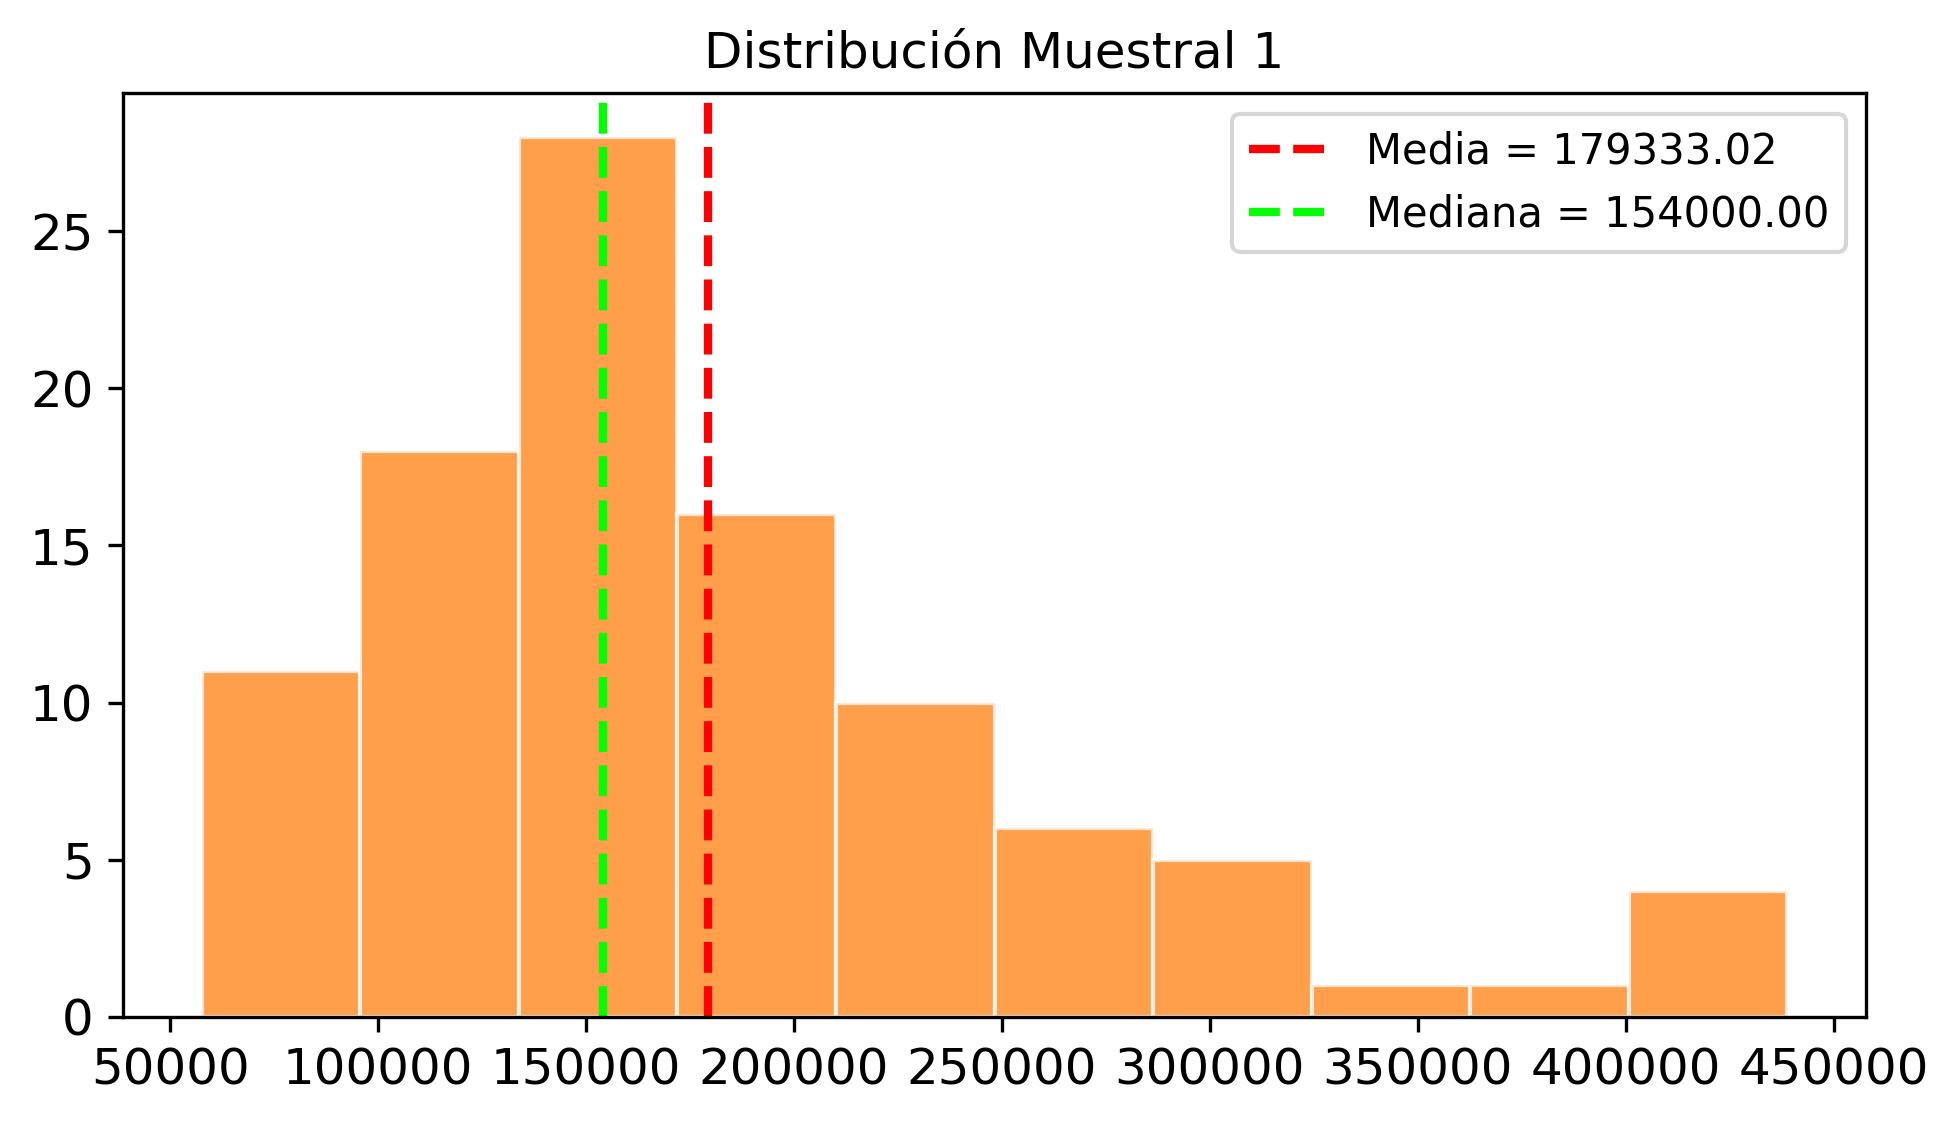

<ipython-input-4-52c072c7ac8a>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = 12)
<ipython-input-4-52c072c7ac8a>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize = 12)


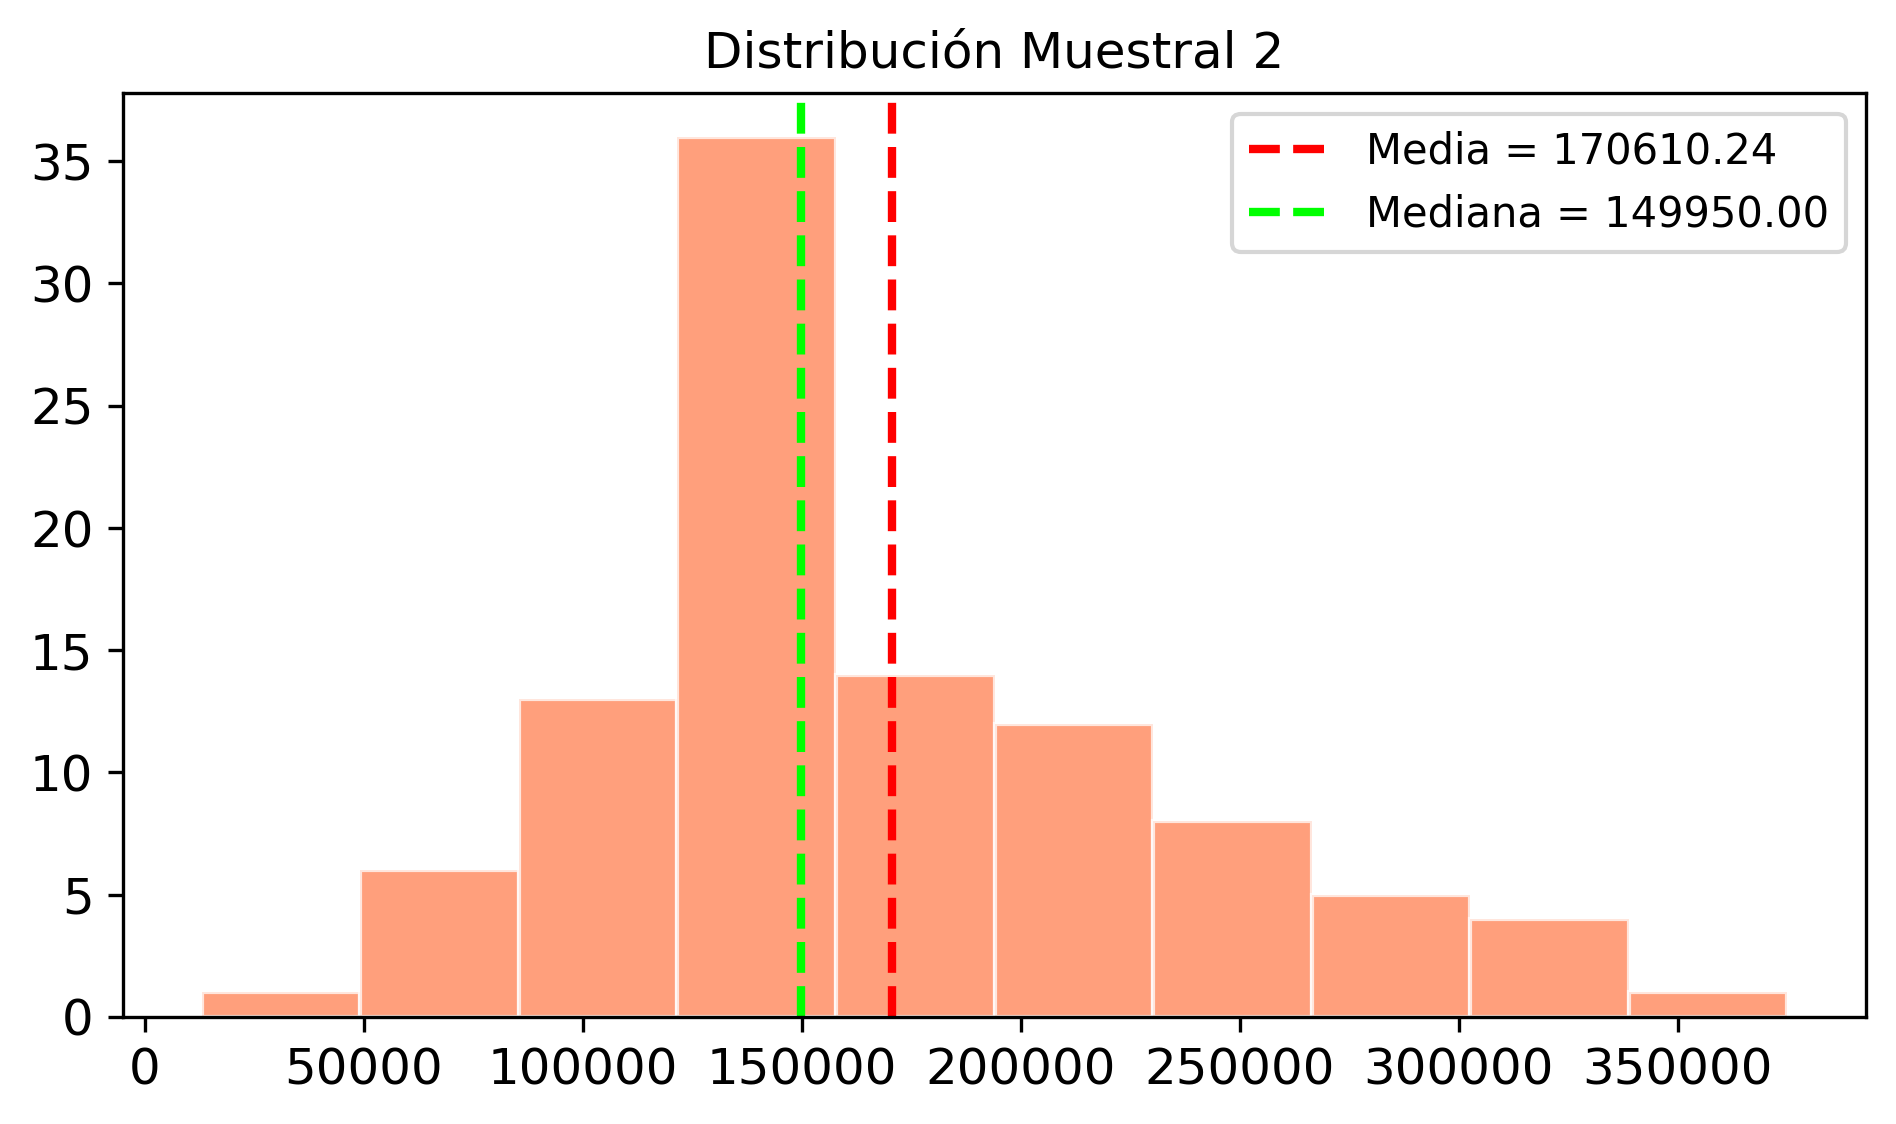

In [6]:
import numpy as np
import matplotlib.pyplot as plt

prices_df = datos['SalePrice']

muestra1 = prices_df.sample(100, random_state=41)
histogram_described(muestra1, mode = False, density=False, hist_color = 'tab:orange', titulo = 'Distribución Muestral 1')
muestra2 = prices_df.sample(100, random_state=43)

histogram_described(muestra2, mode = False, density=False, hist_color = 'coral', titulo = 'Distribución Muestral 2')


Como se vio, si se quieren extraer muestras desde la población es posible utilizar el [método](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) `.sample()` de un DataFrame de Pandas.


Por otro lado, la **distribución muestral** corresponde a todas las distribuciones de esitmaciones puntuales que se pueden obtener a partir de una muestra de tamaño fijo. Para esto, es necesario obtener el estimador puntual en cada una de las muestras, para esto es posible generar un *loop* de forma de obtener una cantidad definida de puntos.

<ipython-input-4-52c072c7ac8a>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = 12)
<ipython-input-4-52c072c7ac8a>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize = 12)


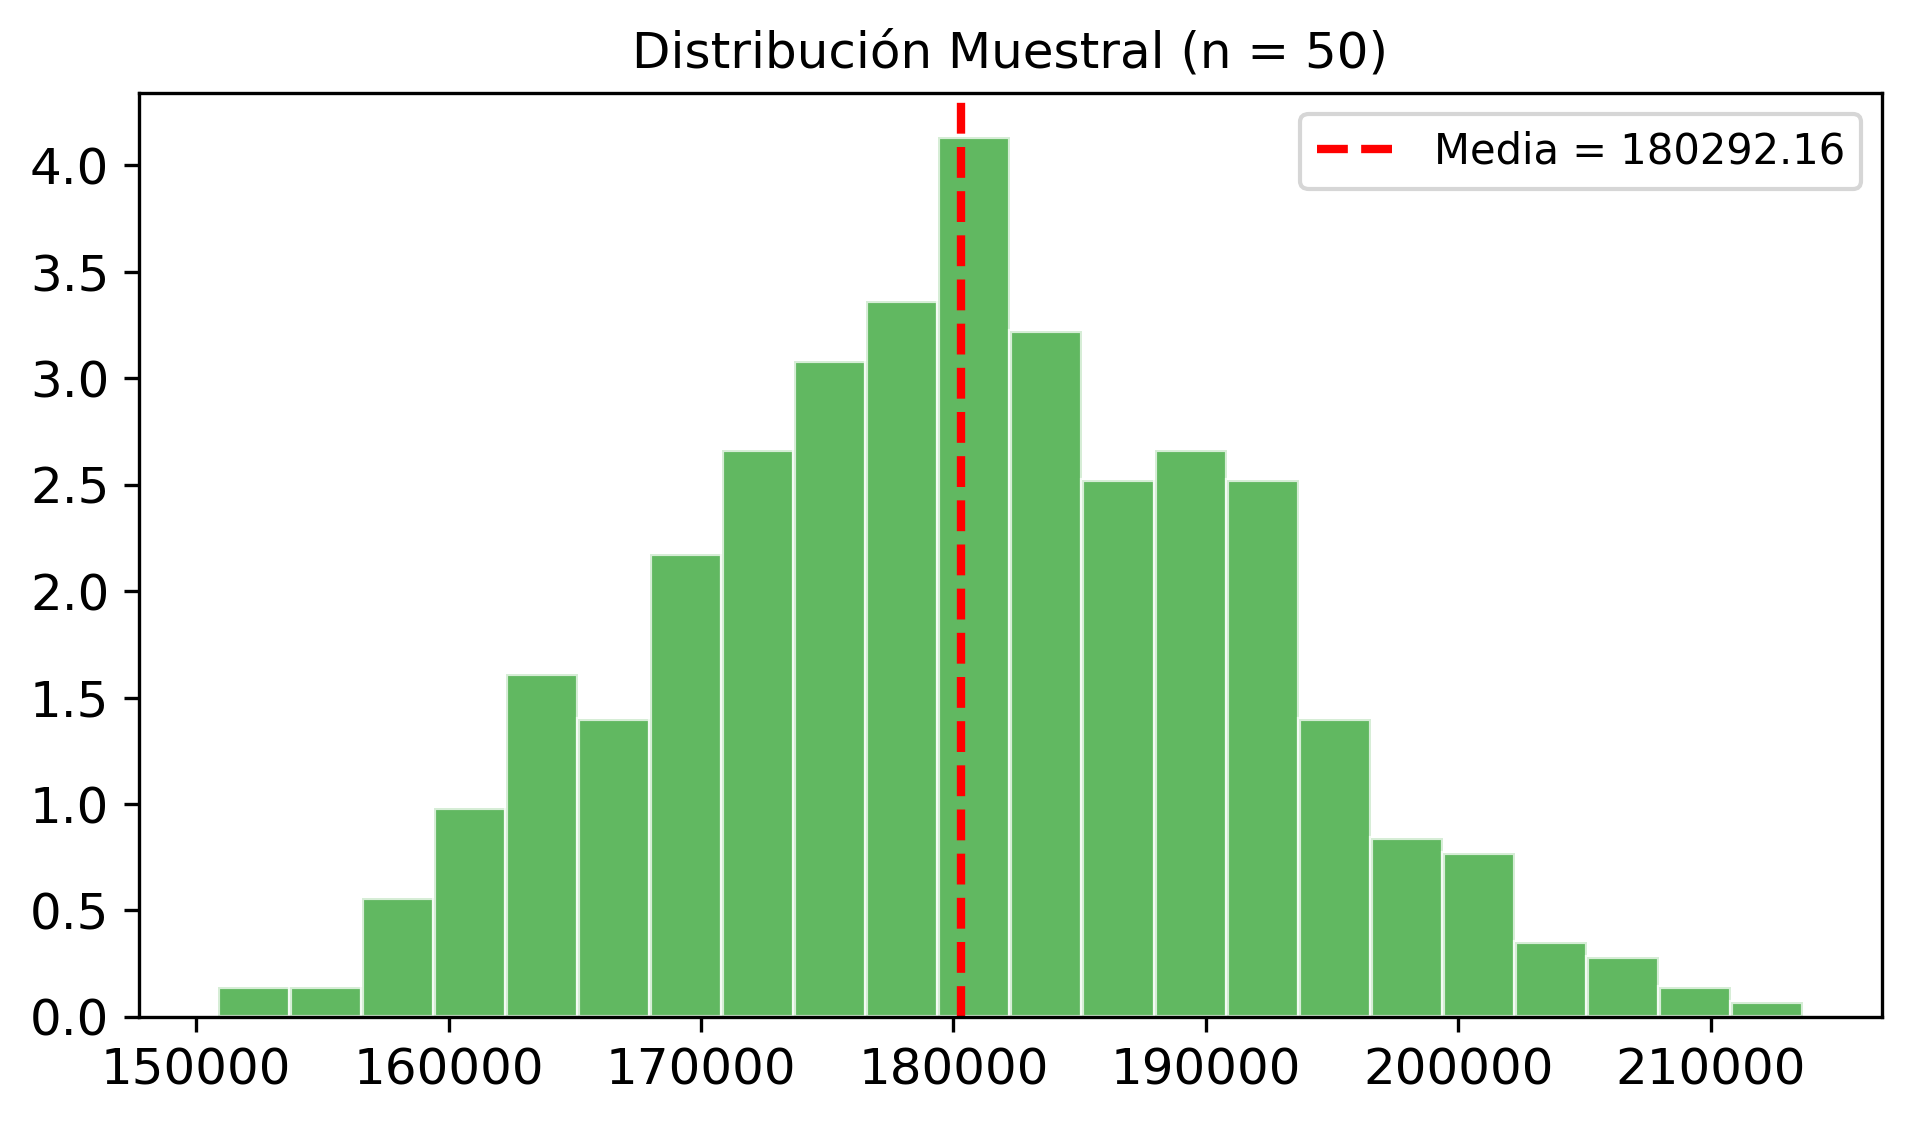

In [7]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df = datos['SalePrice'] # Extraemos los datos de precios
for i in range(500): # cantidad de muestras
    muestra_i = prices_df.sample(50, random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
histogram_described(promedio_muestras, mode = False, median = False, hist_color = 'tab:green',
                    titulo = 'Distribución Muestral (n = 50)')


A la distribución muestrada es posible calcular el error estandar. Este permite cuantificar la incertidumbre de nuestra estimación puntual de la muestra. En este caso, estamos calculando el error estandar del promedio muestral.

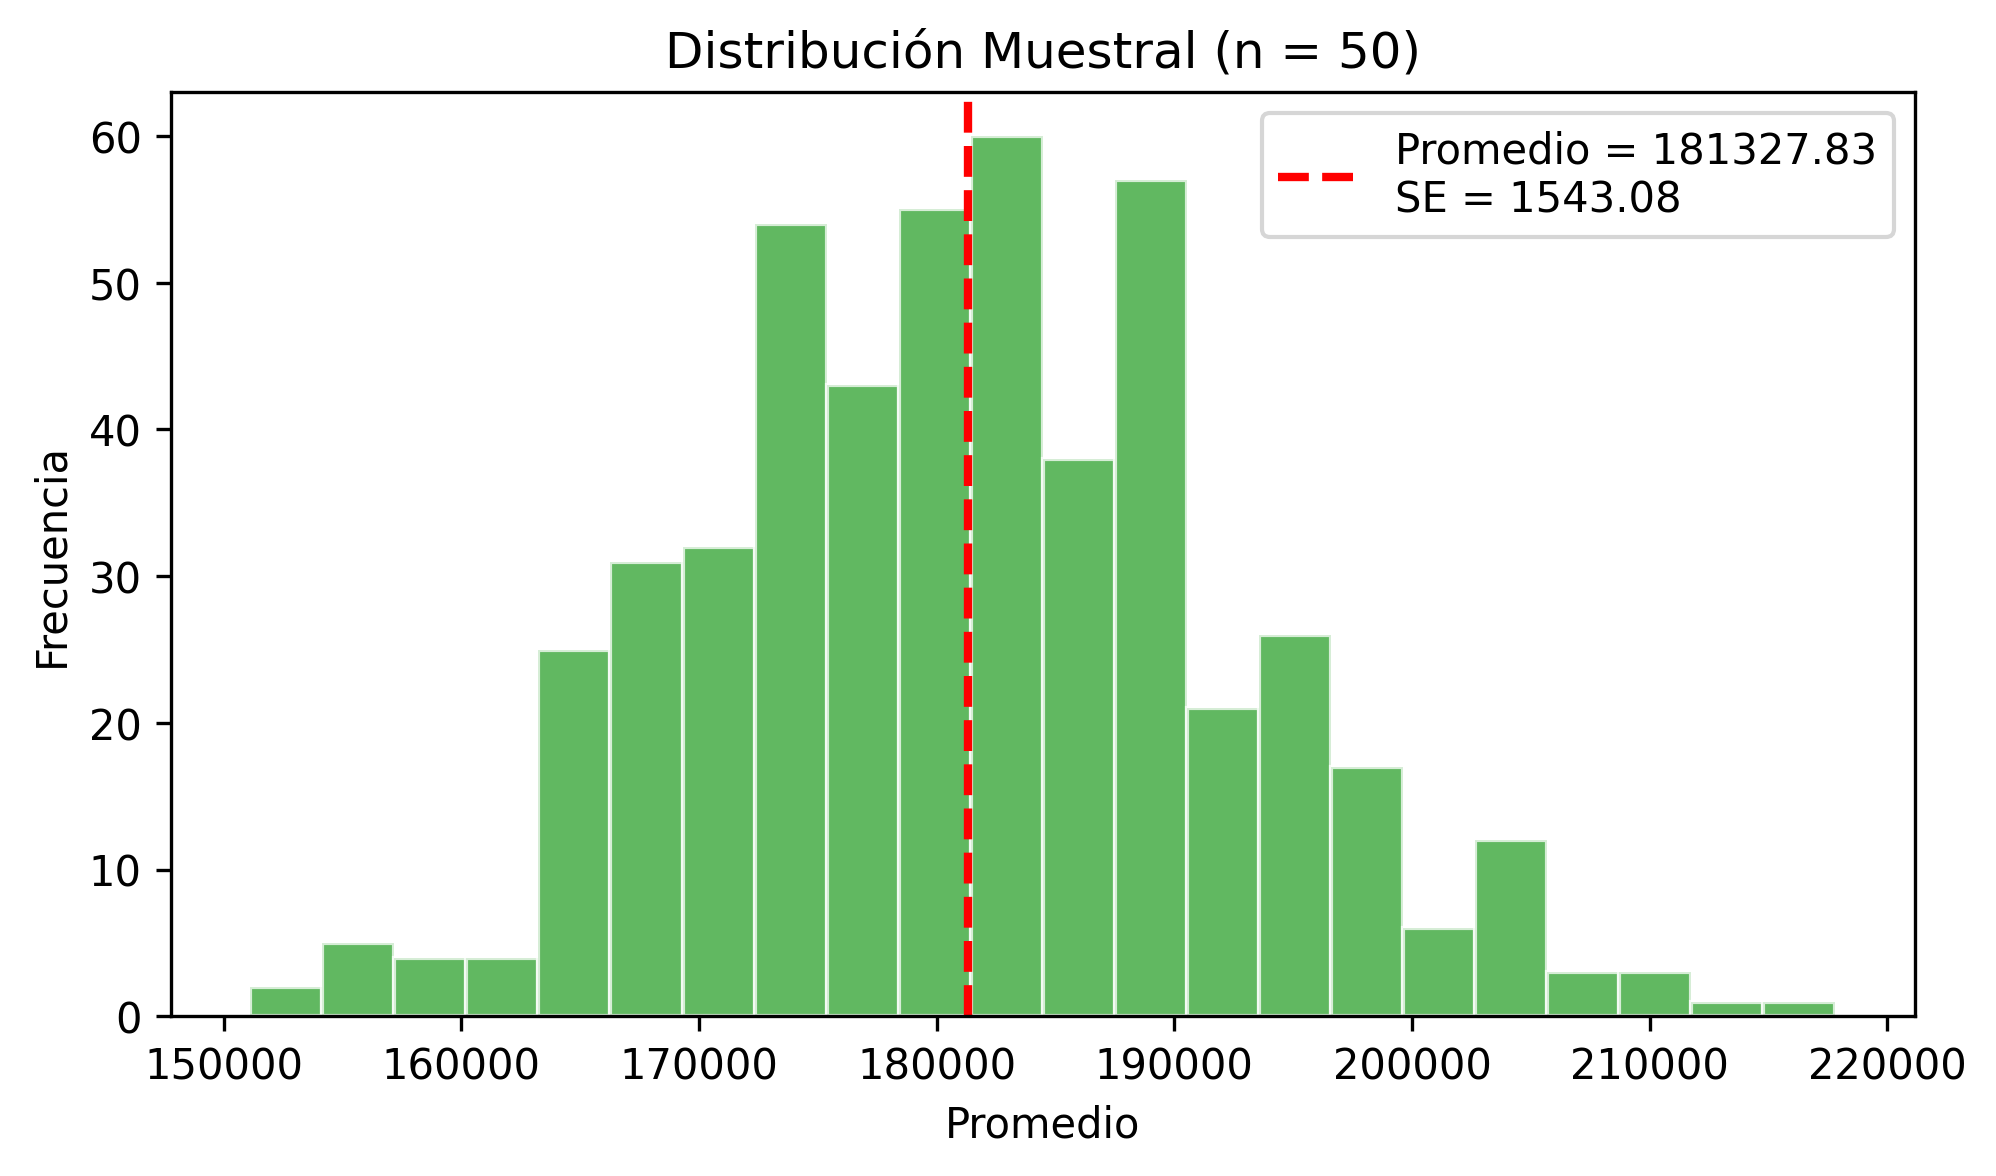

In [8]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df = datos['SalePrice'] # Extraemos los datos de precios
n = 50
for i in range(500): # cantidad de muestras
    muestra_i = prices_df.sample(50)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)

fig, ax = plt.subplots(figsize = (7.5,4), dpi = 300)
mean_promedio = np.mean(promedio_muestras)
se = np.std(promedio_muestras) / np.sqrt(n)
n_bins = np.sqrt(len(promedio_muestras)).astype(int)
ax.hist(promedio_muestras, bins=n_bins, alpha=0.75, color='tab:green', density=False, edgecolor = 'white')

ax.set_title('Distribución Muestral (n = 50)')
ax.set_xlabel('Promedio')
ax.set_ylabel('Frecuencia')
ax.axvline(mean_promedio, color='r', linestyle='dashed', linewidth=2, label = f'Promedio = {mean_promedio:.2f}\nSE = {se:.2f}')
ax.legend()
plt.show()

A medida que $n\to∞$ el error estándar del primedio muestral se acerca a 0. De esta forma, tenemos:

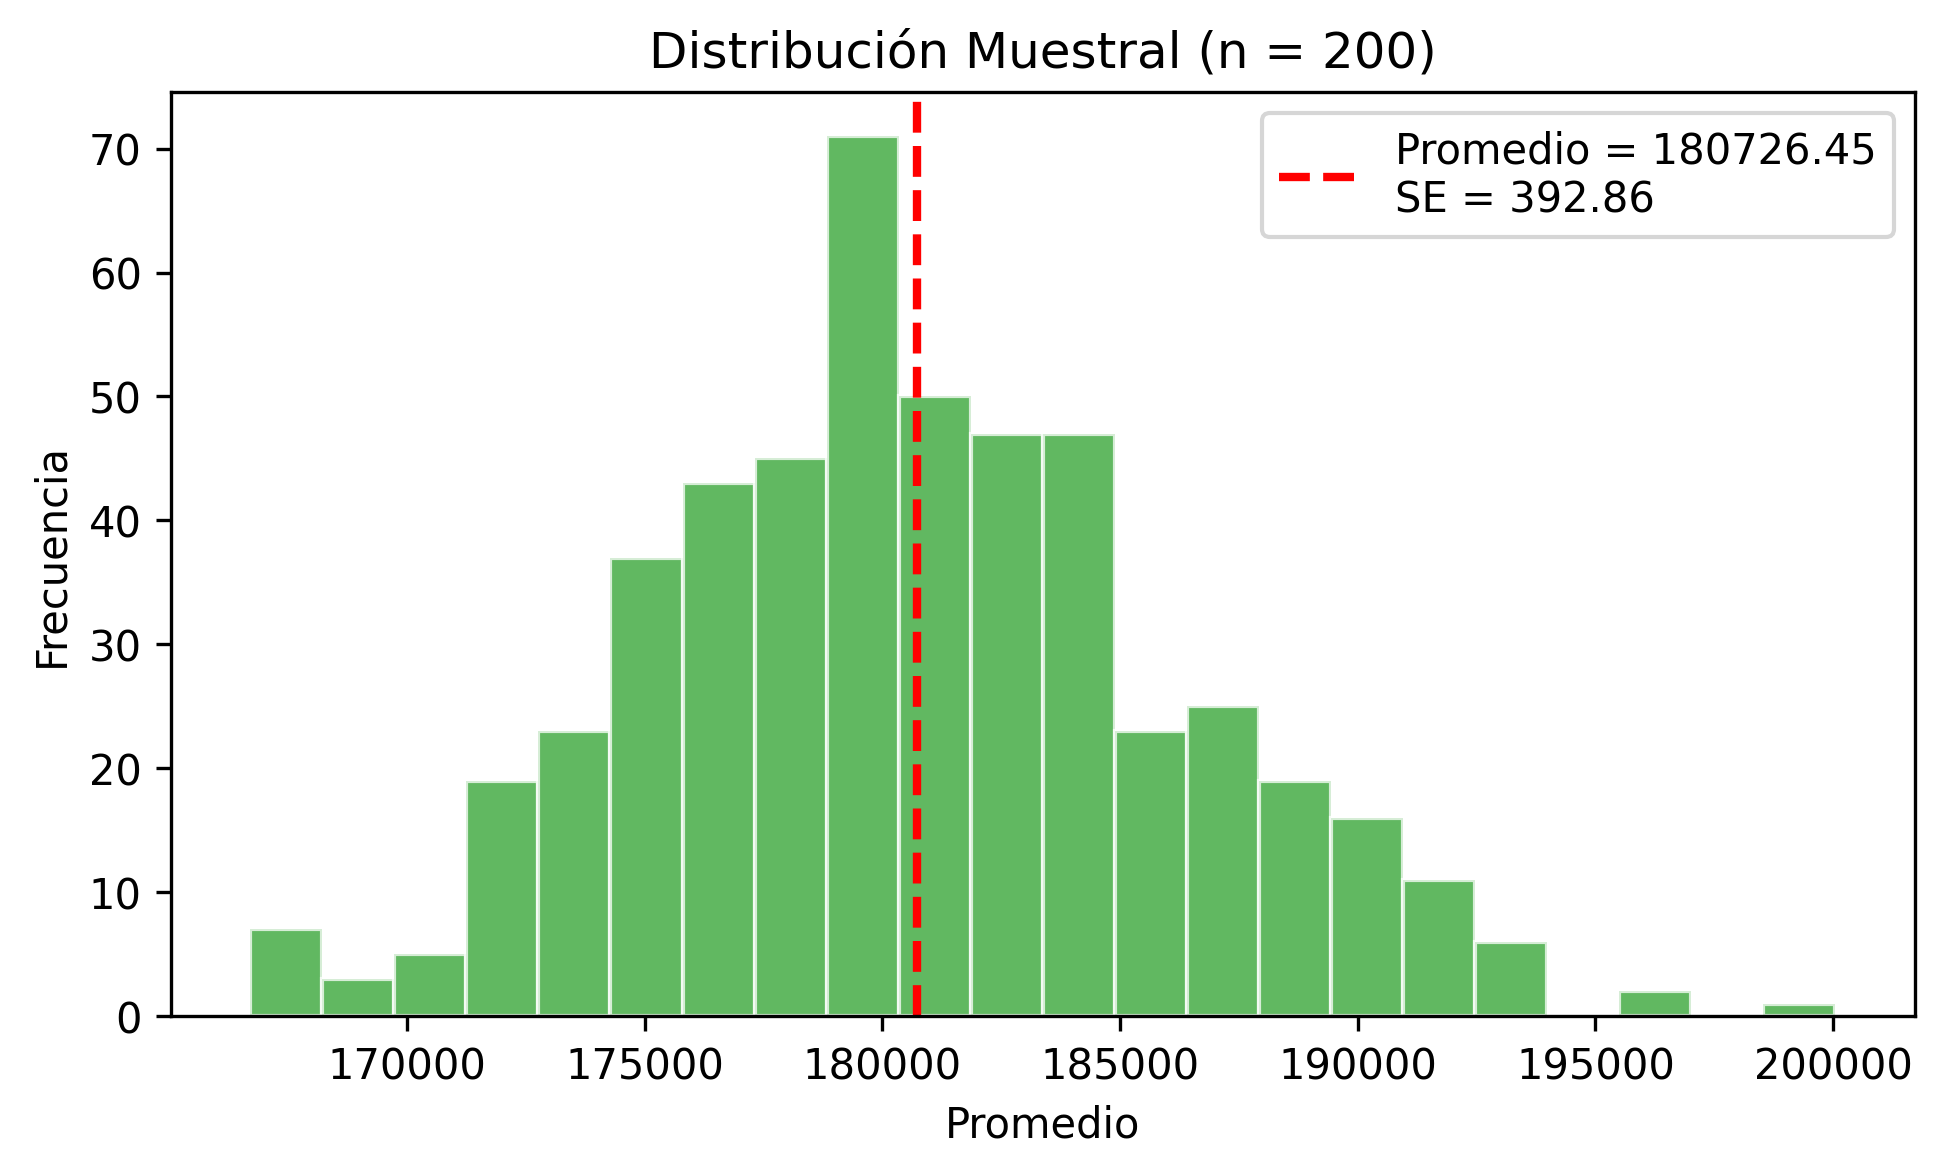

In [9]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df =  datos['SalePrice'] # Extraemos los datos de precios
n = 200
for i in range(500): # cantidad de muestras
    muestra_i = prices_df.sample(n, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(figsize = (7.5,4), dpi = 300)
mean_promedio = np.mean(promedio_muestras)
se = np.std(promedio_muestras) / np.sqrt(n)
n_bins = np.sqrt(len(promedio_muestras)).astype(int)
ax.hist(promedio_muestras, bins=n_bins, alpha=0.75, color='tab:green', density=False, edgecolor = 'white')

ax.set_title(f'Distribución Muestral (n = {n})')
ax.set_xlabel('Promedio')
ax.set_ylabel('Frecuencia')
ax.axvline(mean_promedio, color='r', linestyle='dashed', linewidth=2, label = f'Promedio = {mean_promedio:.2f}\nSE = {se:.2f}')
ax.legend()
plt.show()

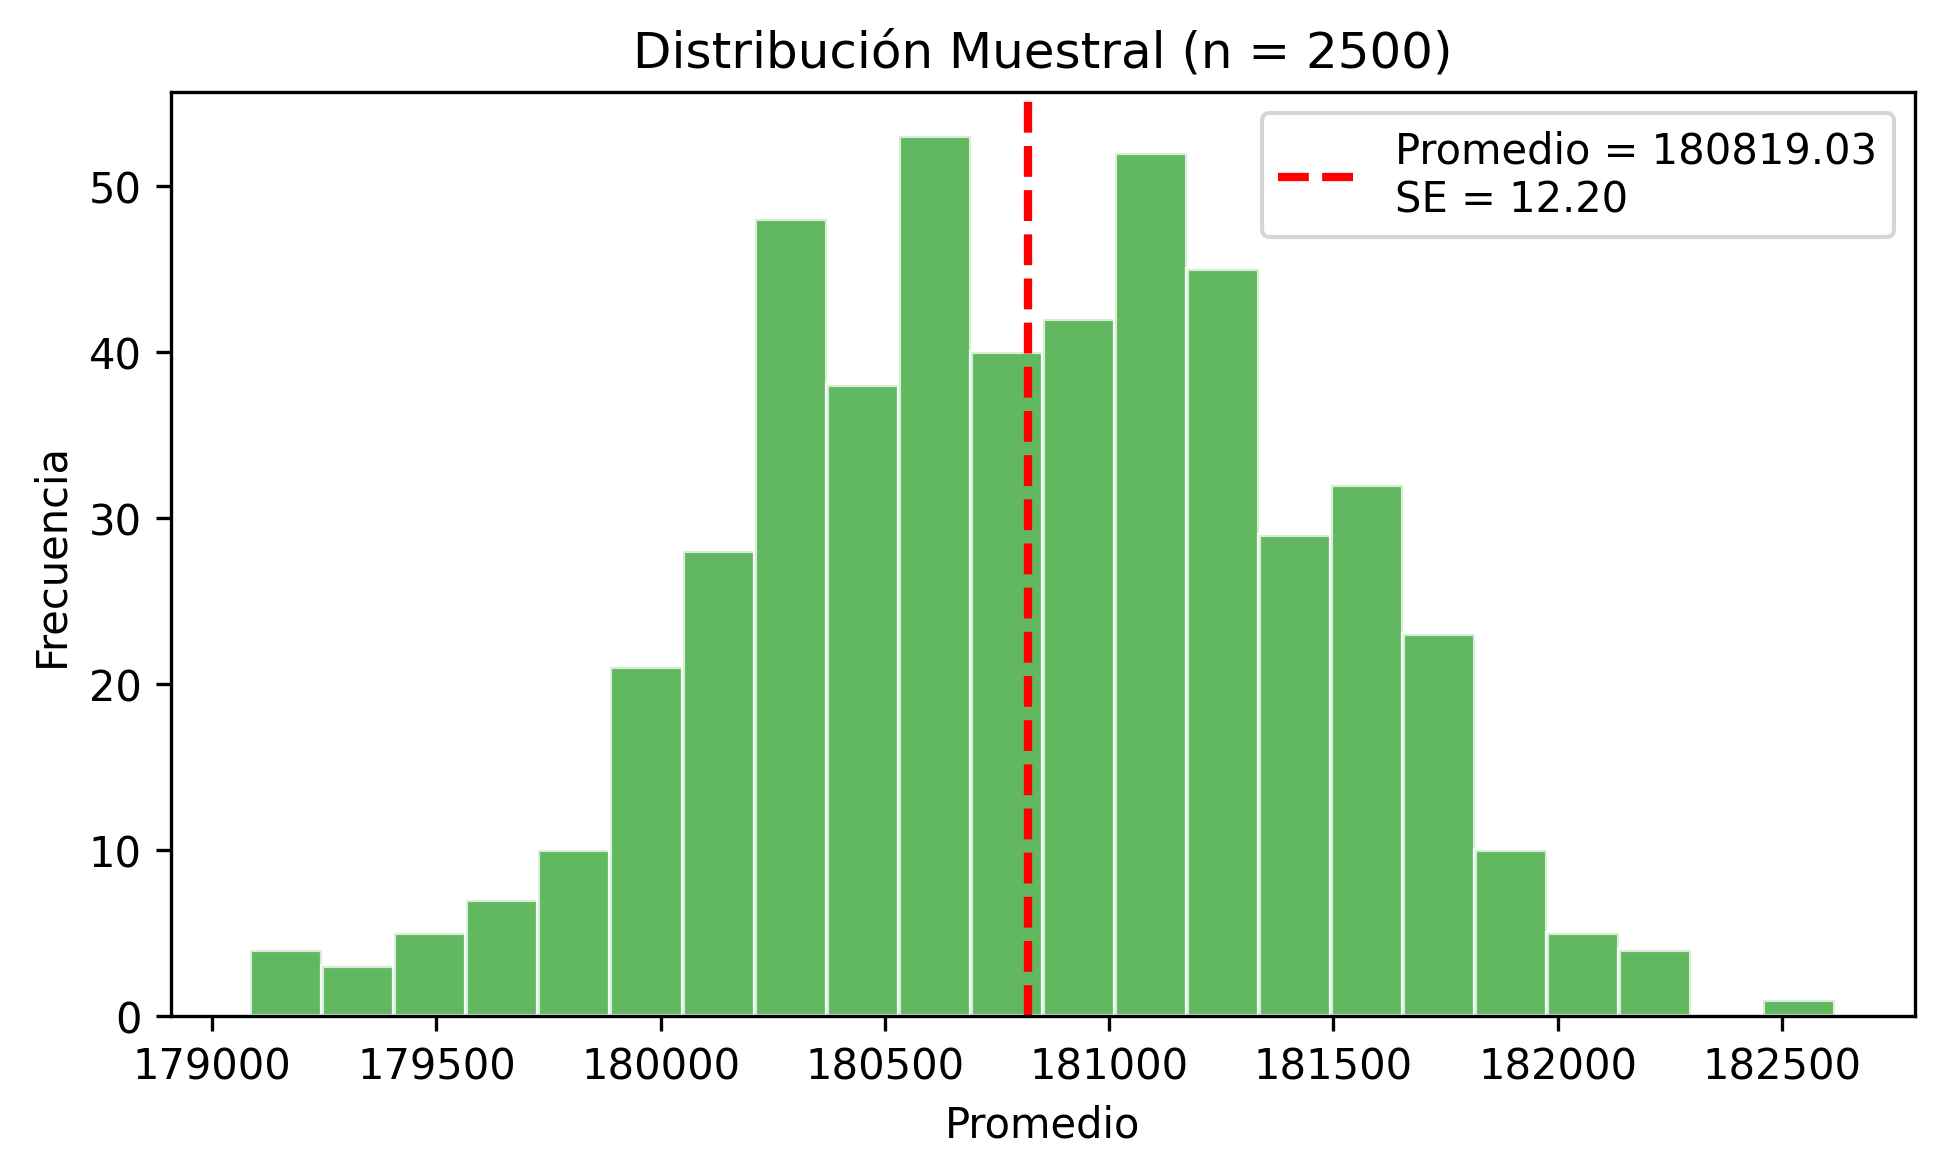

In [10]:
# Definimos una lista que guardará los datos
promedio_muestras = []
prices_df =  datos['SalePrice'] # Extraemos los datos de precios
n = 2500
for i in range(500): # cantidad de muestras
    muestra_i = prices_df.sample(n, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(figsize = (7.5,4), dpi = 300)
mean_promedio = np.mean(promedio_muestras)
se = np.std(promedio_muestras) / np.sqrt(n)
n_bins = np.sqrt(len(promedio_muestras)).astype(int)
ax.hist(promedio_muestras, bins=n_bins, alpha=0.75, color='tab:green', density=False, edgecolor = 'white')

ax.set_title(f'Distribución Muestral (n = {n})')
ax.set_xlabel('Promedio')
ax.set_ylabel('Frecuencia')
ax.axvline(mean_promedio, color='r', linestyle='dashed', linewidth=2, label = f'Promedio = {mean_promedio:.2f}\nSE = {se:.2f}')
ax.legend()
plt.show()

Podemos ver que a medida que aumenta el numero de datos en la muestra, más se acerca el promedio muestral al promedio poblacional:

,n,media_muestral,dif_media
0,2,214750.0,-33953.939932
1,12,181850.333333,-1054.273265
2,22,189236.363636,-8440.303568
3,32,165804.15625,14991.903818
4,42,185950.904762,-5154.844694


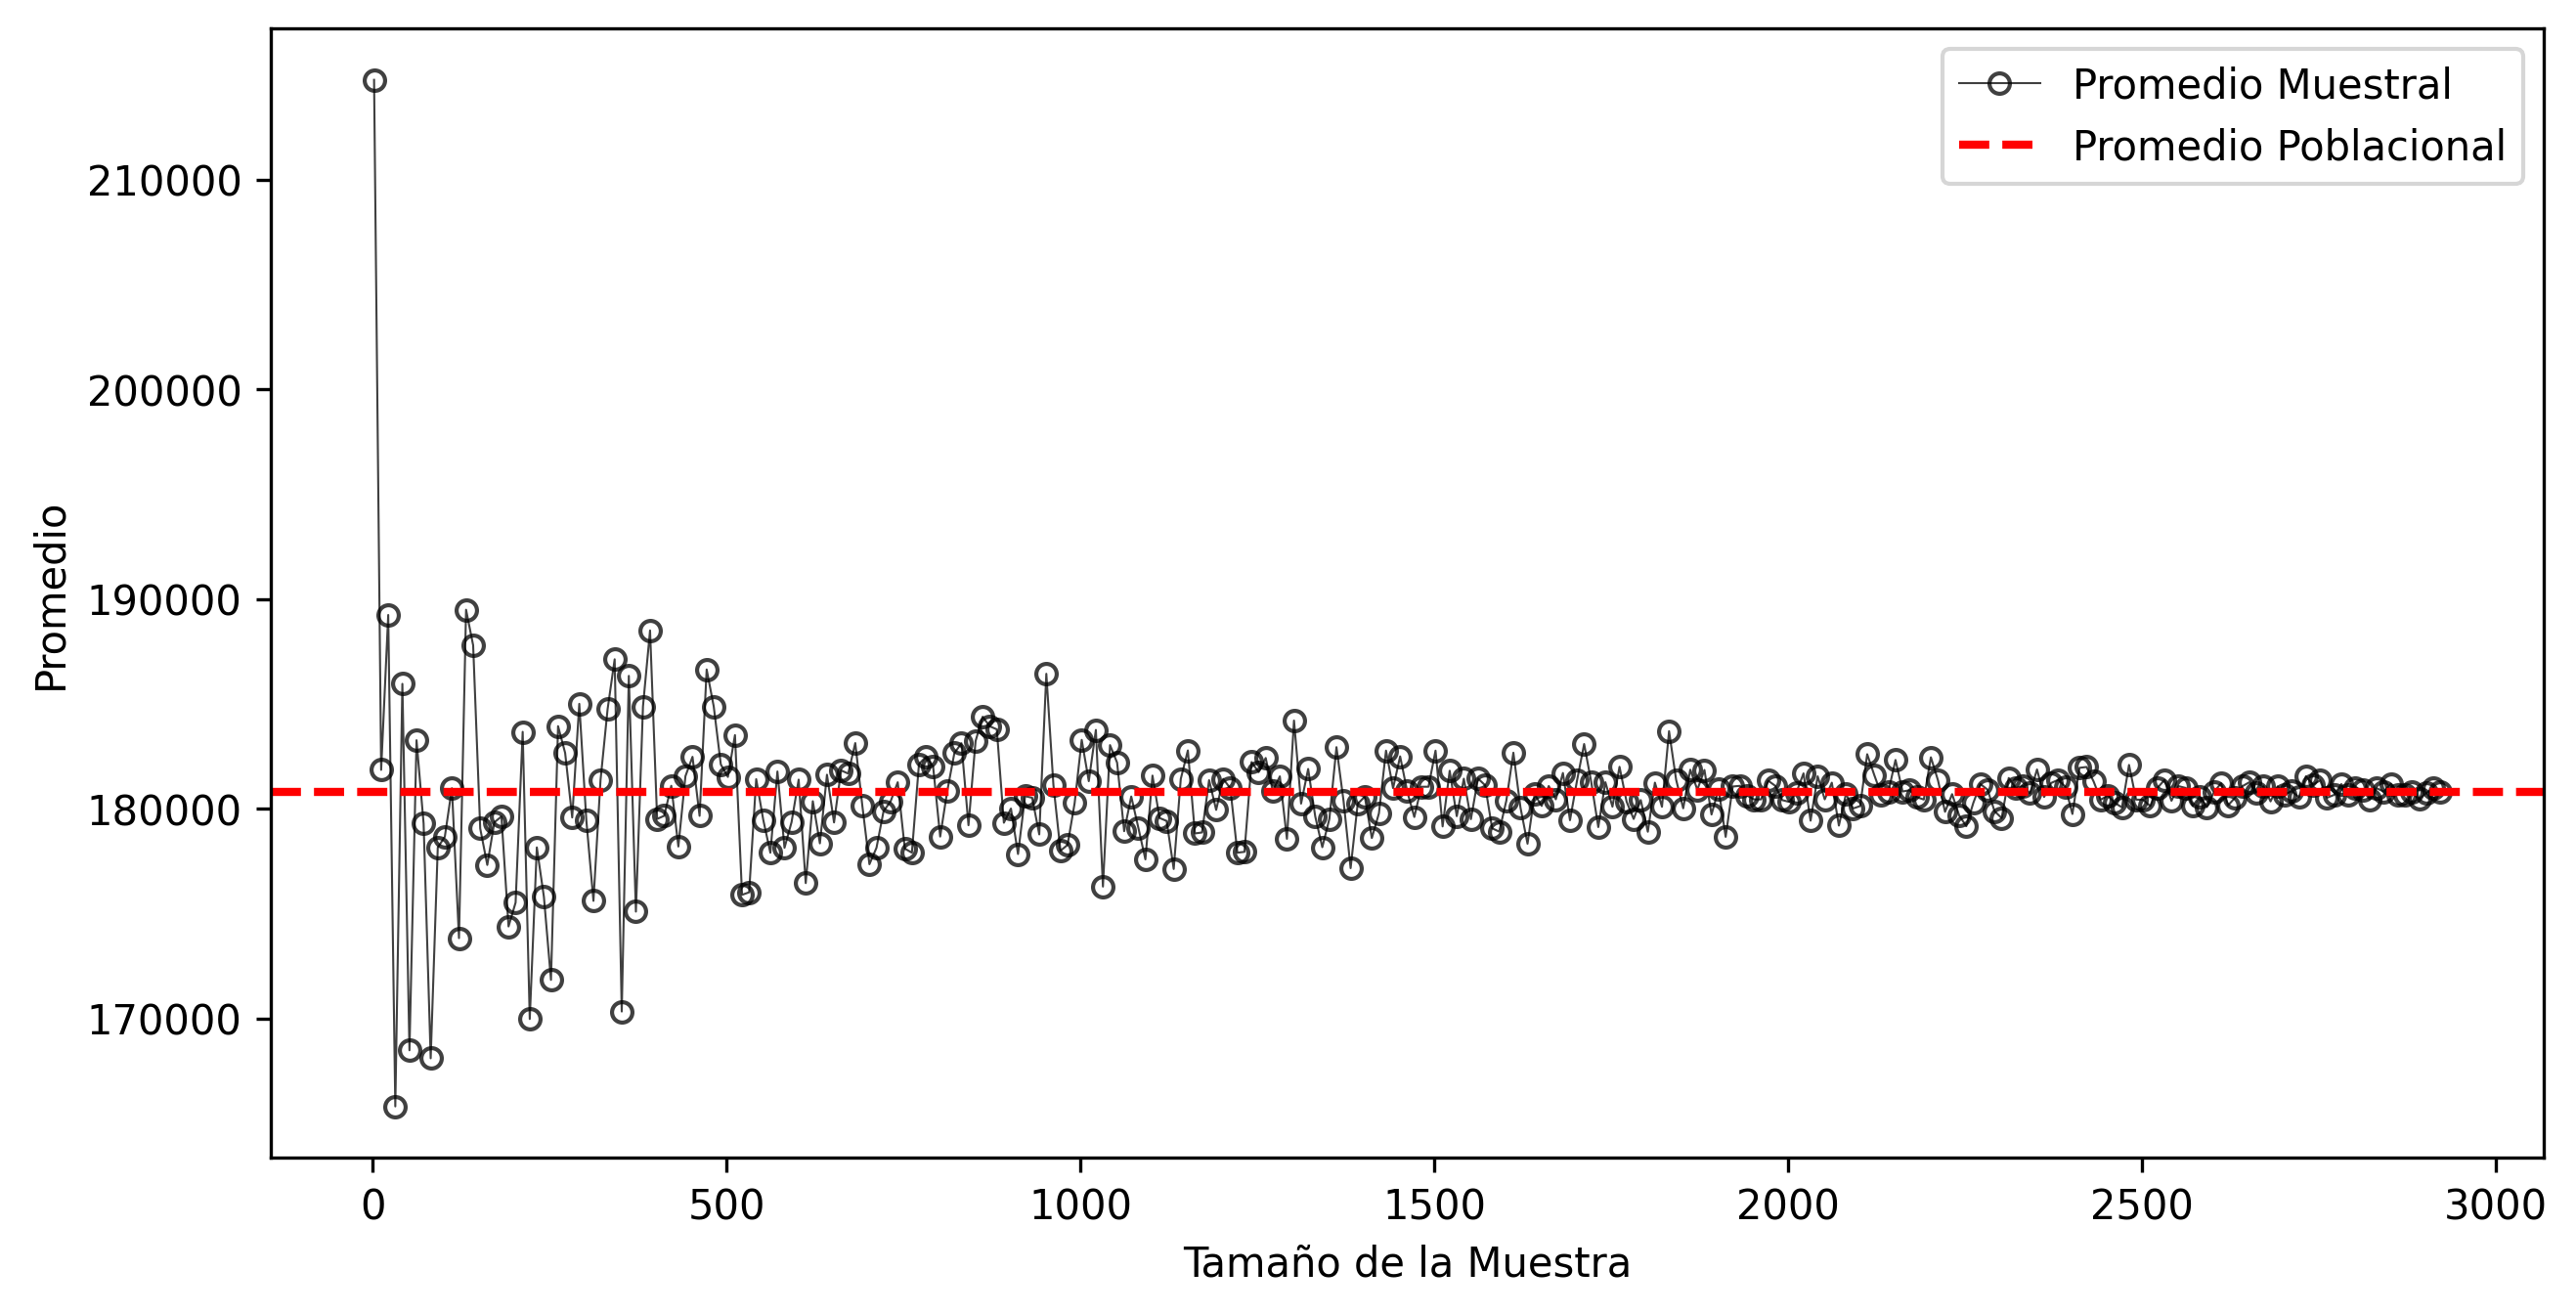

In [11]:
promedios = []
prices_df =  datos['SalePrice']
promedio_total = prices_df.mean()
df_muestral = pd.DataFrame(columns = ['n', 'media_muestral', 'dif_media'])
for index,i in enumerate(range(2, len(datos), 10)):
    sample = prices_df.sample(i, random_state = i)
    promedios.append(np.mean(sample))
    df_muestral.at[index, 'n'] = i
    df_muestral.at[index, 'media_muestral'] = np.mean(sample)
    df_muestral.at[index, 'dif_media'] =  promedio_total - np.mean(sample)
fig, ax = plt.subplots(figsize = (10,5), dpi = 300)

ax.plot(np.arange(2,len(datos), 10 ), promedios, linestyle = '-', label = 'Promedio Muestral', marker = 'o',
        linewidth = 0.5,color = 'k', markersize = 5, alpha = 0.75, mfc='none',mec = 'k')
ax.axhline(np.mean(prices_df), color='r', linestyle='dashed', linewidth=2, label = 'Promedio Poblacional')
ax.legend(loc = 'upper right')
ax.set_xlabel('Tamaño de la Muestra')
ax.set_ylabel('Promedio')

df_muestral.head()

## Teorema del Límite Central

En términos prácticos, el **Teorema del Límite Central** dice que la distribución muestral es aproximadamente normal, centrado en torno al promedio poblacional, considerando que el tamaño de la muestra es suficientemente grande para compensar la asimetría.

### Ejemplo de Juguete

Las distribuciones muestrales tienden a una distribución **Normal**, cuando la cantidad de datos por muestra aumenta.

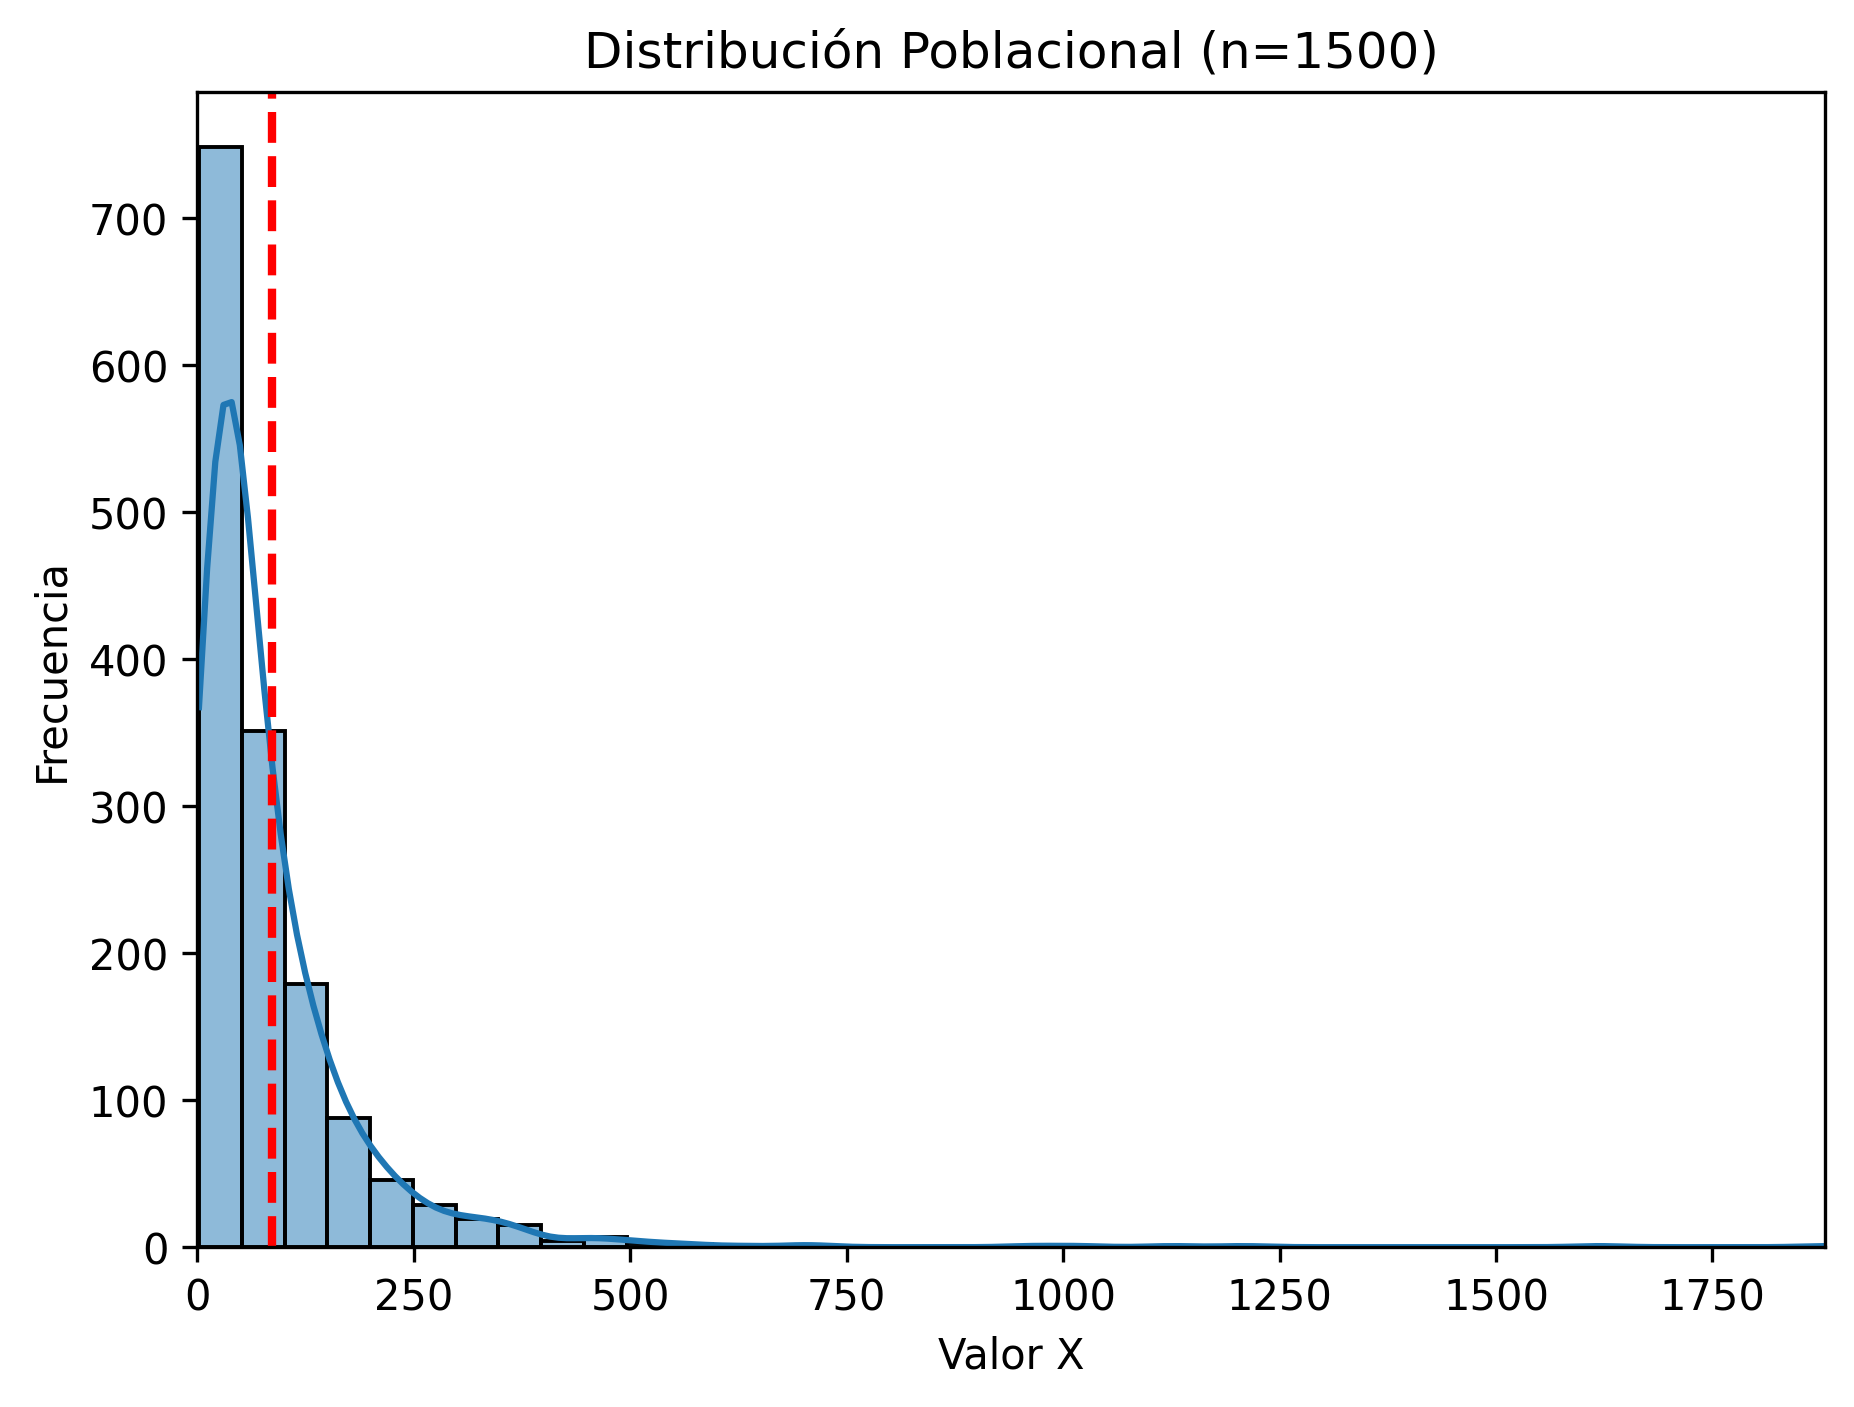

In [12]:
import seaborn as sns
datos_aleatorios = np.random.lognormal(mean = 4, sigma = 1, size = 1500)
fig, ax = plt.subplots(figsize = (7,5), dpi = 300)
sns.histplot(datos_aleatorios, ax = ax,
             fill = True, kde = True, color = 'tab:blue', alpha = 0.5,
             bins = int(np.sqrt(len(datos_aleatorios))))
ax.set_xlim([0, datos_aleatorios.max()])
ax.axvline(np.mean(datos_aleatorios), color='r', linestyle='dashed', linewidth=2)
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Valor X')
ax.set_title('Distribución Poblacional (n=1500)')
plt.show()

Podemos ver en los siguientes histogramas que las distribuciones se hacen más acotadas y se asemejan más a una distribución normal.

Promedio Muestral: 86.19
Promedio Muestral: 86.69
Promedio Muestral: 86.50


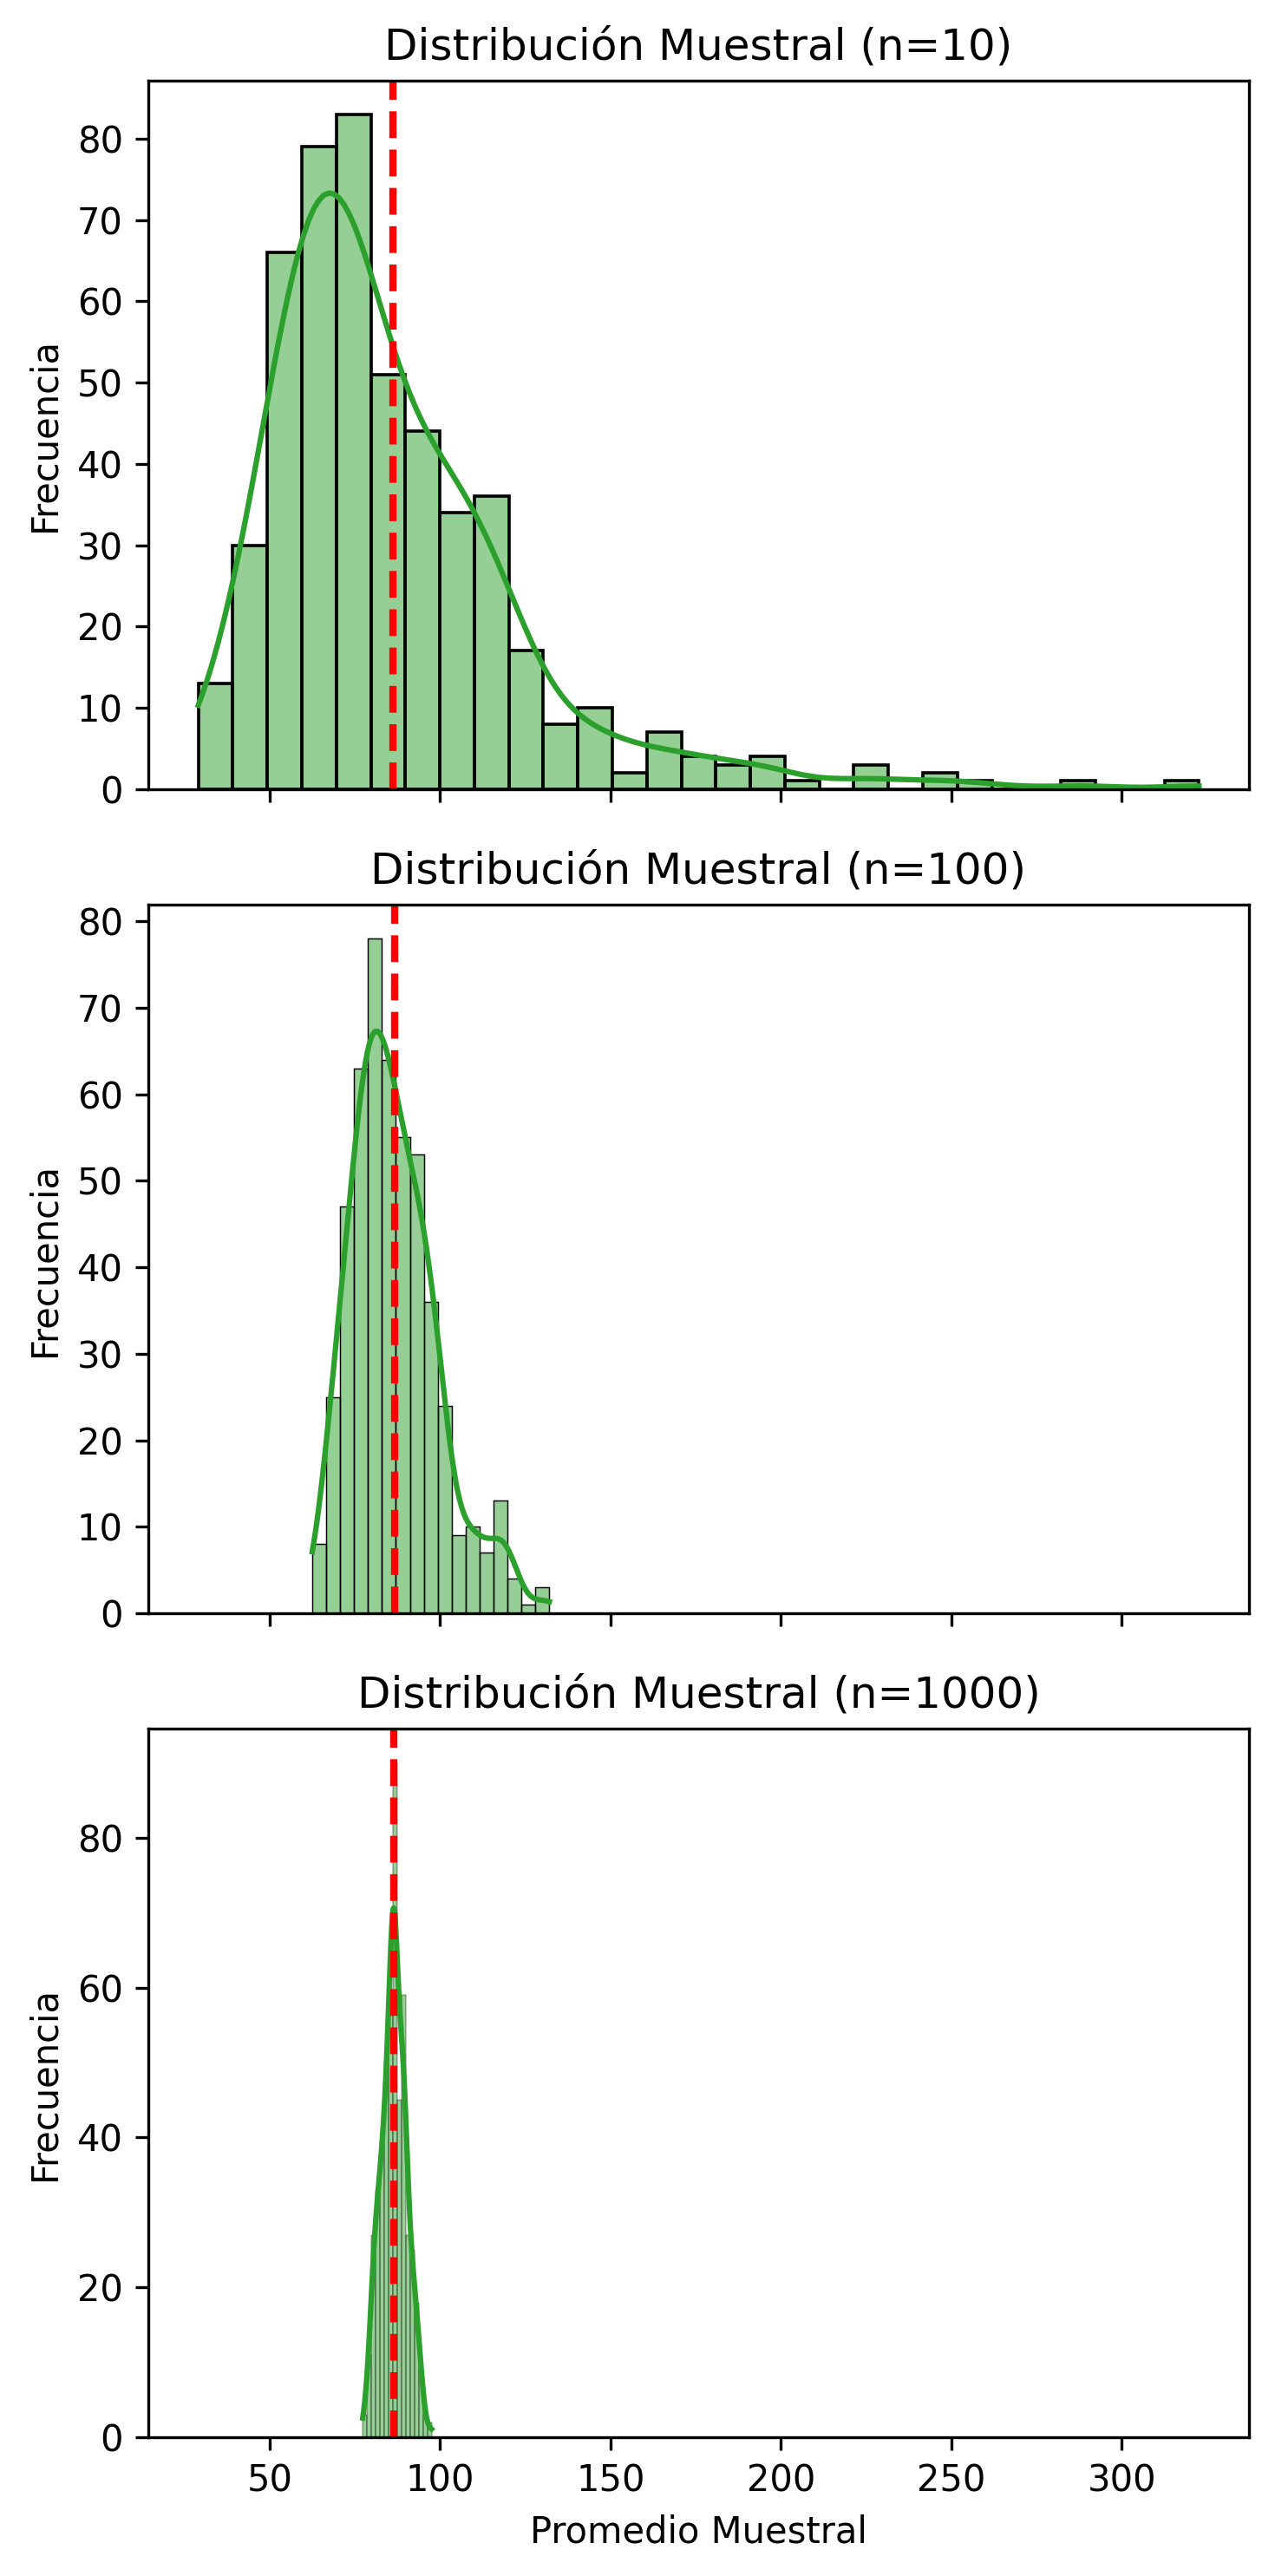

In [13]:

fig, ax = plt.subplots(3, 1,figsize = (5,10), dpi = 300, sharex = True)
for plot_i, i in enumerate([10, 100, 1000]):
    prom_i = []
    for _ in range(500):
        muestra_i = np.random.choice(datos_aleatorios, i)
        prom_i.append(np.mean(muestra_i))

    sns.histplot(prom_i, ax = ax[plot_i],
             fill = True, kde = True, color = 'tab:green', alpha = 0.5)
    ax[plot_i].axvline(np.mean(prom_i), color='r', linestyle='dashed', linewidth=2)
    ax[plot_i].set_ylabel('Frecuencia')

    ax[plot_i].set_title(f'Distribución Muestral (n={i})')
    # plt.show()

    print(f'Promedio Muestral: {np.mean(prom_i):.2f}')

ax[2].set_xlabel('Promedio Muestral')
fig.tight_layout()

Verifiquemos la normalidad de nuestras distribuciones por medio de QQ-plots

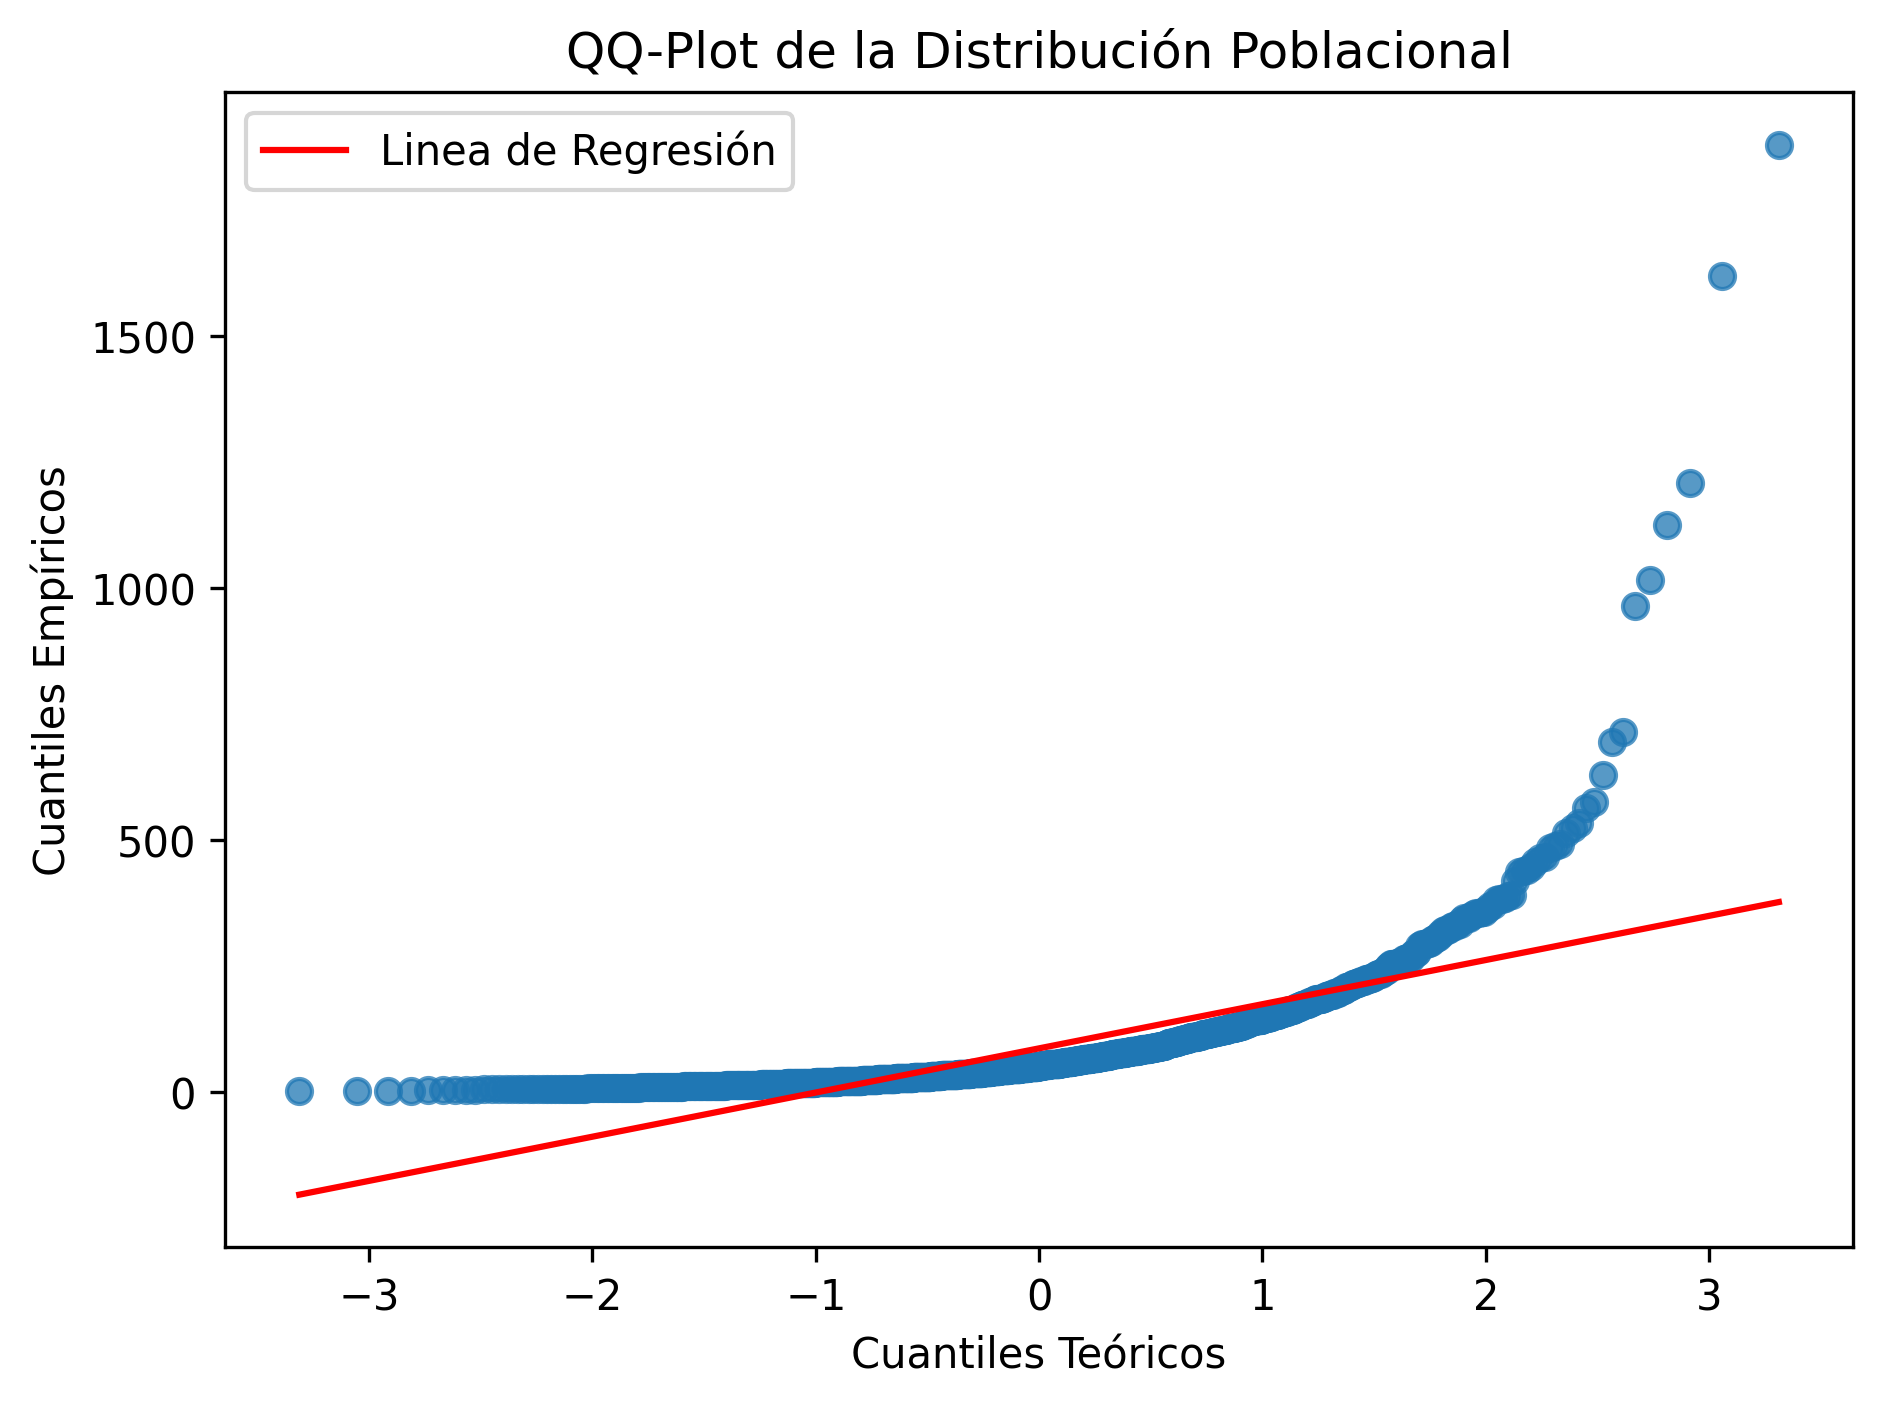

In [14]:
# qqplot de la distribución originial
from scipy.stats import probplot
fig, ax = plt.subplots(figsize = (7,5), dpi = 300)
(osm, osr), (slope, intercept, r) = probplot(datos_aleatorios,
                                             dist='norm', fit=True)
ax.scatter(osm, osr, color = 'tab:blue', alpha = 0.75)
ax.set_xlabel('Cuantiles Teóricos')
ax.set_ylabel('Cuantiles Empíricos')
nums = np.linspace(np.min(osm),np.max(osm) )
ax.plot(nums, nums*slope + intercept, color = 'r', label = 'Linea de Regresión')
ax.set_title('QQ-Plot de la Distribución Poblacional')
ax.legend()
plt.show()

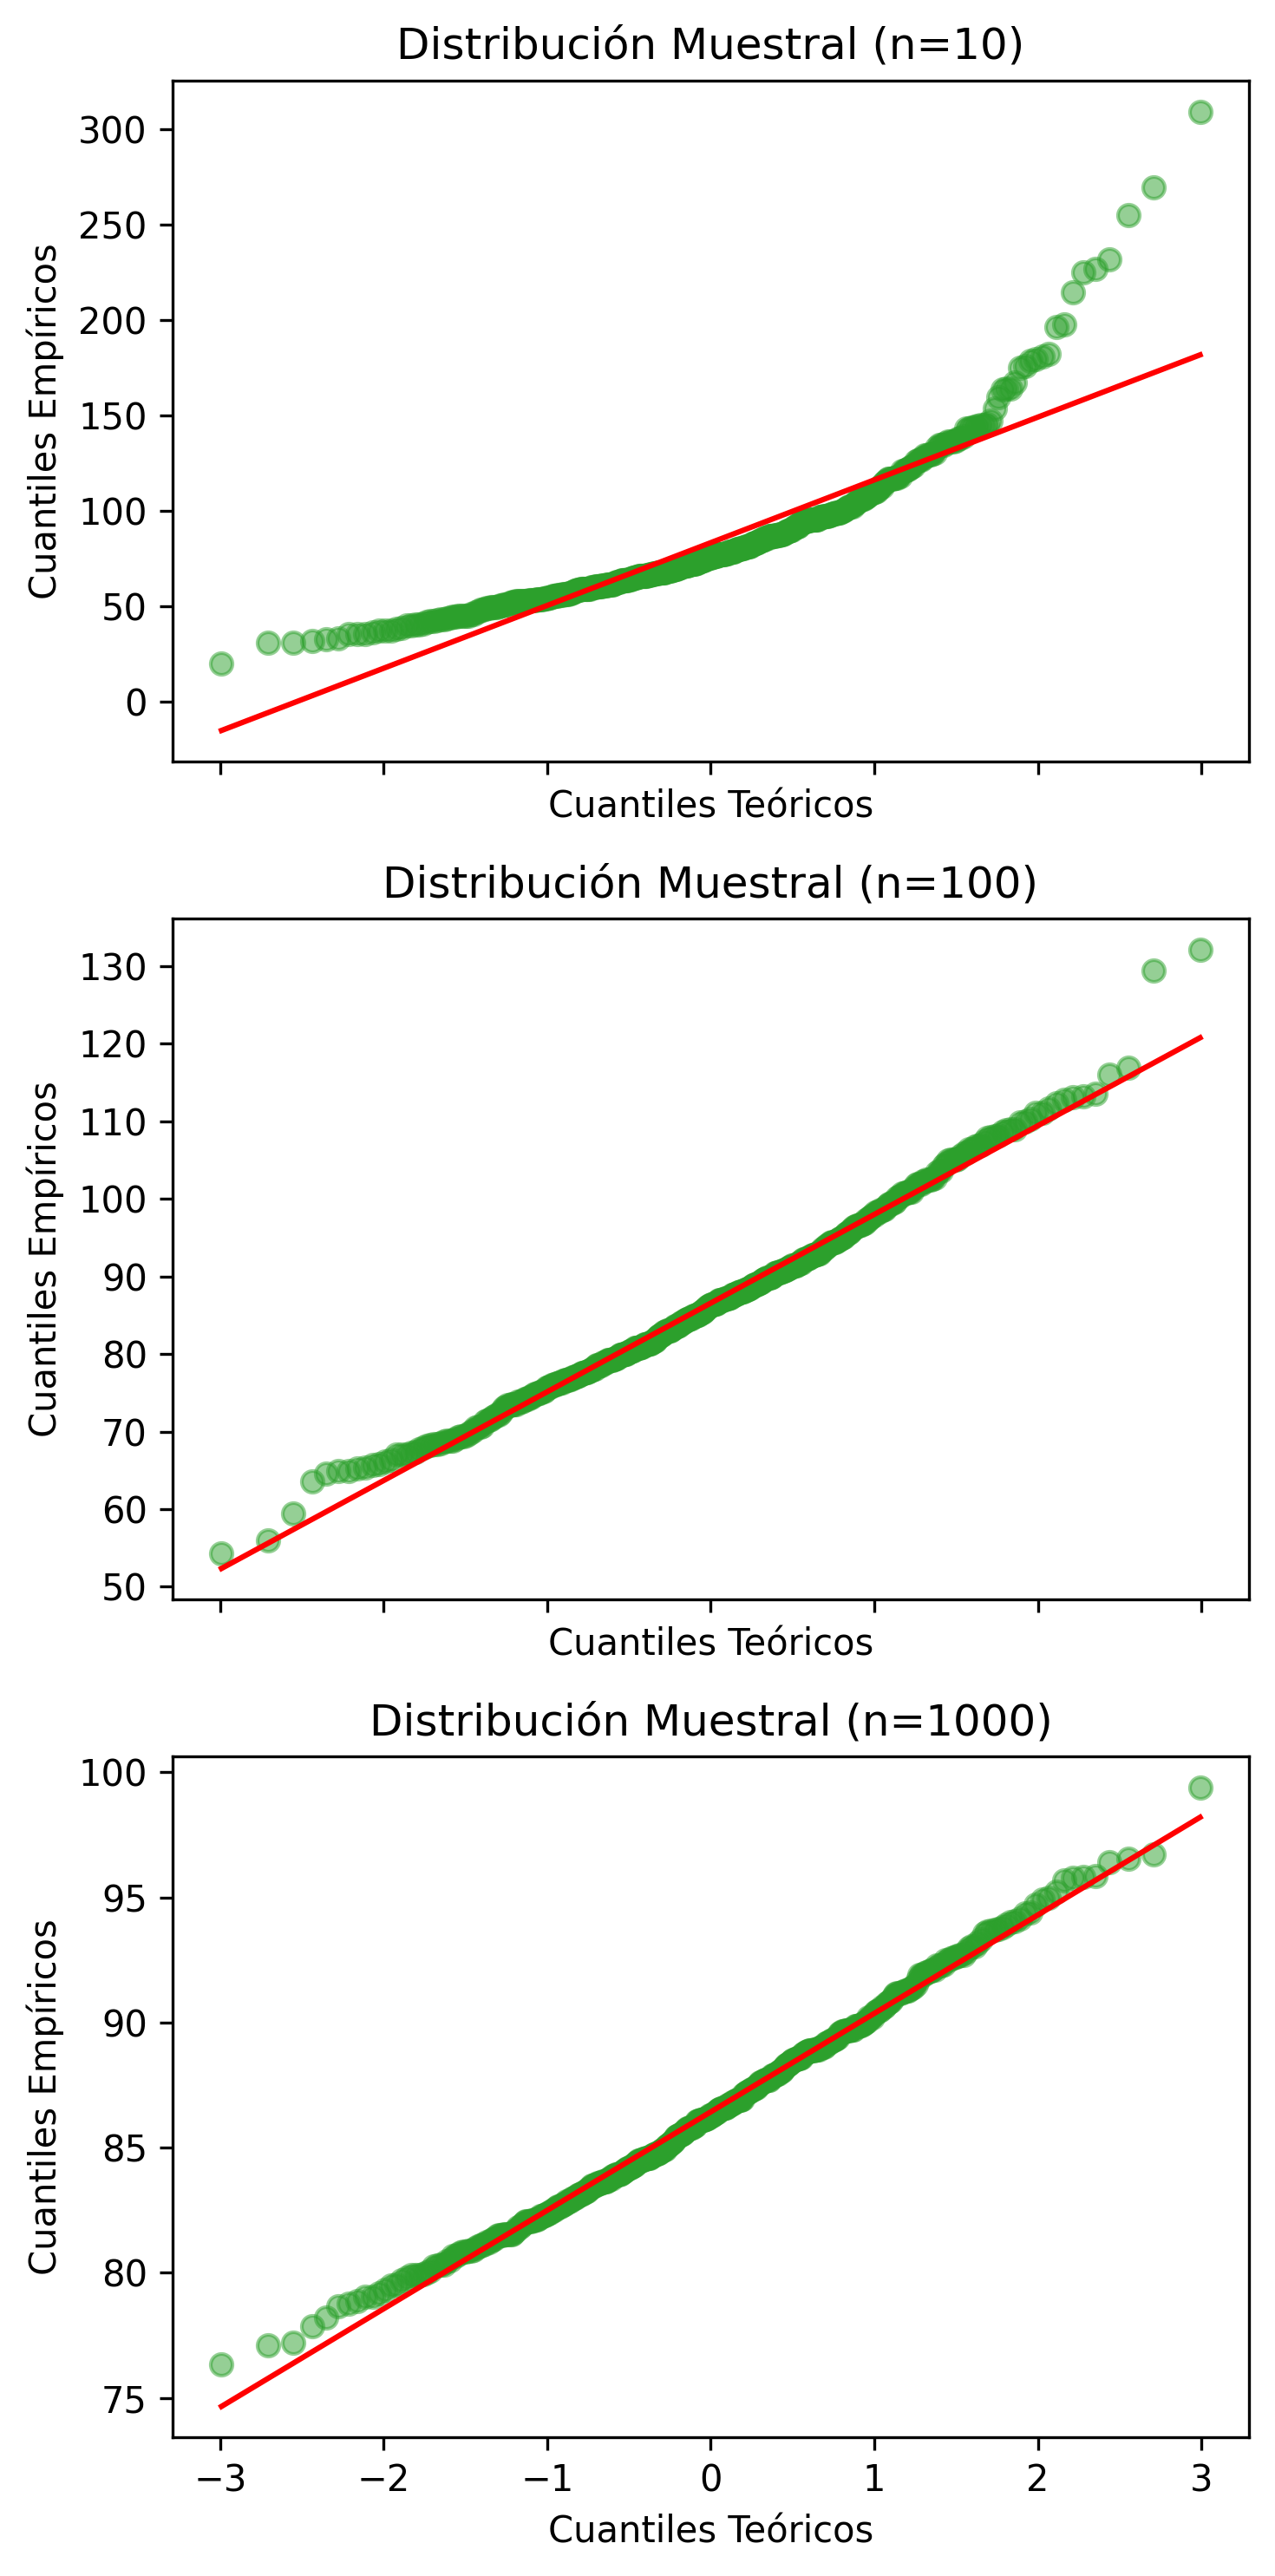

In [15]:

fig, ax = plt.subplots(3, 1,figsize = (5,10), dpi = 300, sharex = True)
for plot_i, i in enumerate([10, 100, 1000]):
    prom_i = []
    for _ in range(500):
        muestra_i = np.random.choice(datos_aleatorios, i)
        prom_i.append(np.mean(muestra_i))
    (osm, osr), (slope, intercept, r) = probplot(prom_i,
                                             dist='norm', fit=True)
    ax[plot_i].scatter(osm, osr, color = 'tab:green',alpha = 0.5)
    ax[plot_i].set_xlabel('Cuantiles Teóricos')
    ax[plot_i].set_ylabel('Cuantiles Empíricos')
    nums = np.linspace(np.min(osm),np.max(osm) )
    ax[plot_i].plot(nums, nums*slope + intercept, color = 'r')
    ax[plot_i].set_title(f'Distribución Muestral (n={i})')

fig.tight_layout()

### Ejemplo con SalePrice

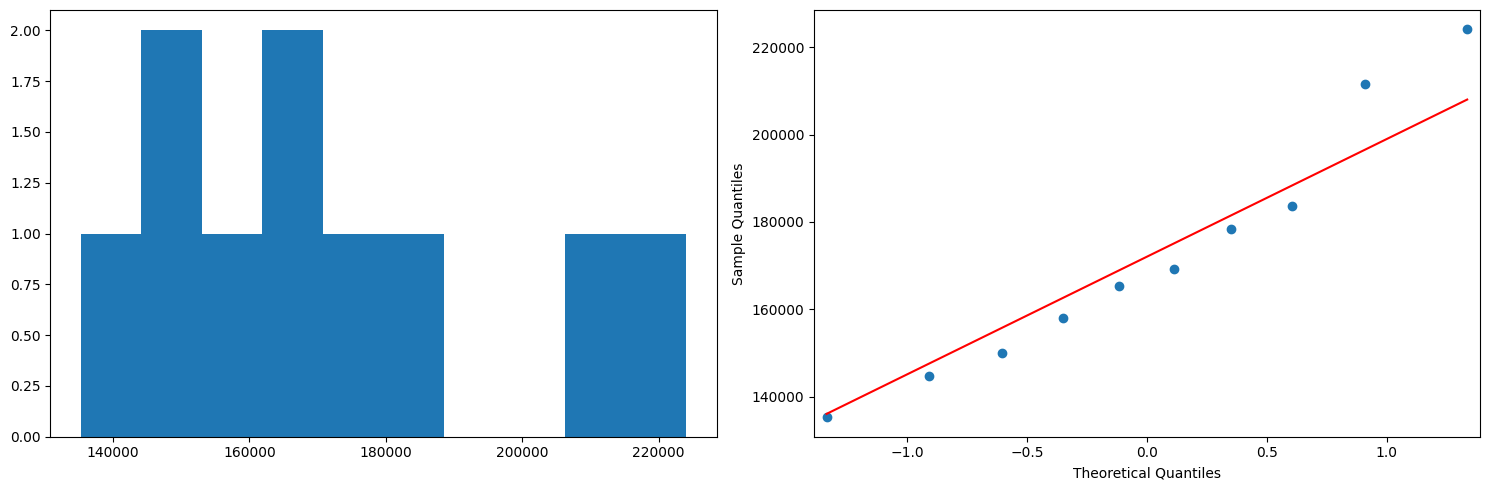

In [16]:
# Definimos una lista que guardará los datos
import statsmodels.api as sm
promedio_muestras = []
prices_df = datos['SalePrice'] # Extraemos los datos de precios
for i in range(10): # cantidad de muestras
    muestra_i = prices_df.sample(10, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(promedio_muestras)
sm.qqplot(np.array(promedio_muestras), line='s', ax=ax[1])
fig.tight_layout()
plt.show()

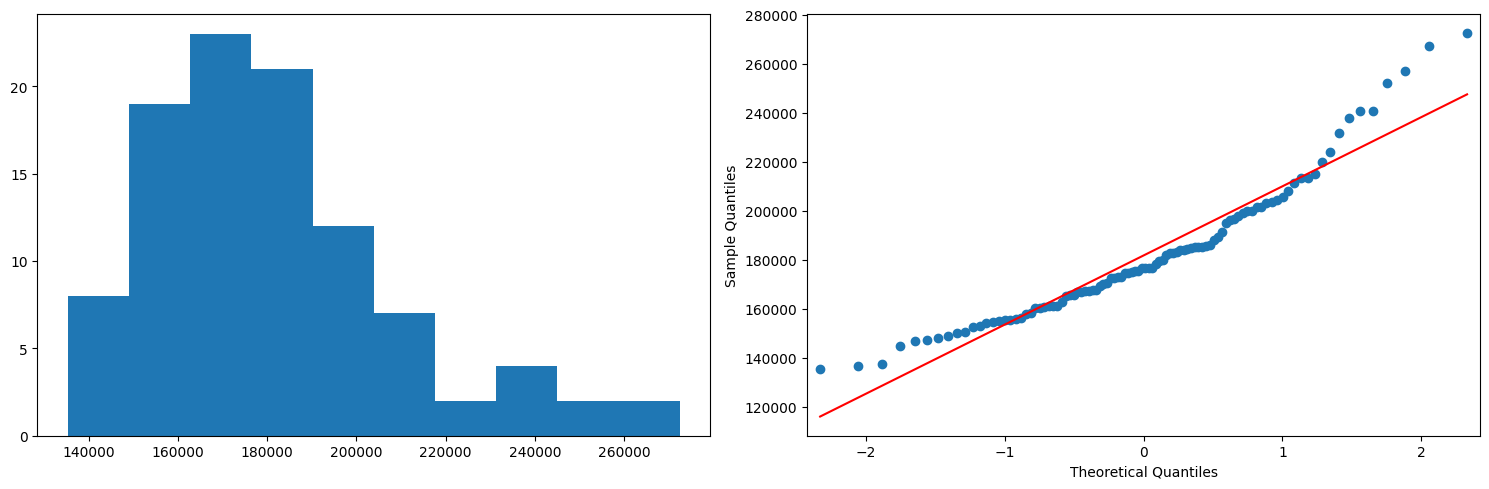

In [17]:
# Definimos una lista que guardará los datos
import statsmodels.api as sm
promedio_muestras = []
prices_df = datos['SalePrice'] # Extraemos los datos de precios
for i in range(100): # cantidad de muestras
    muestra_i = prices_df.sample(10, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(promedio_muestras)
sm.qqplot(np.array(promedio_muestras), line='s', ax = ax[1])
fig.tight_layout()
plt.show()

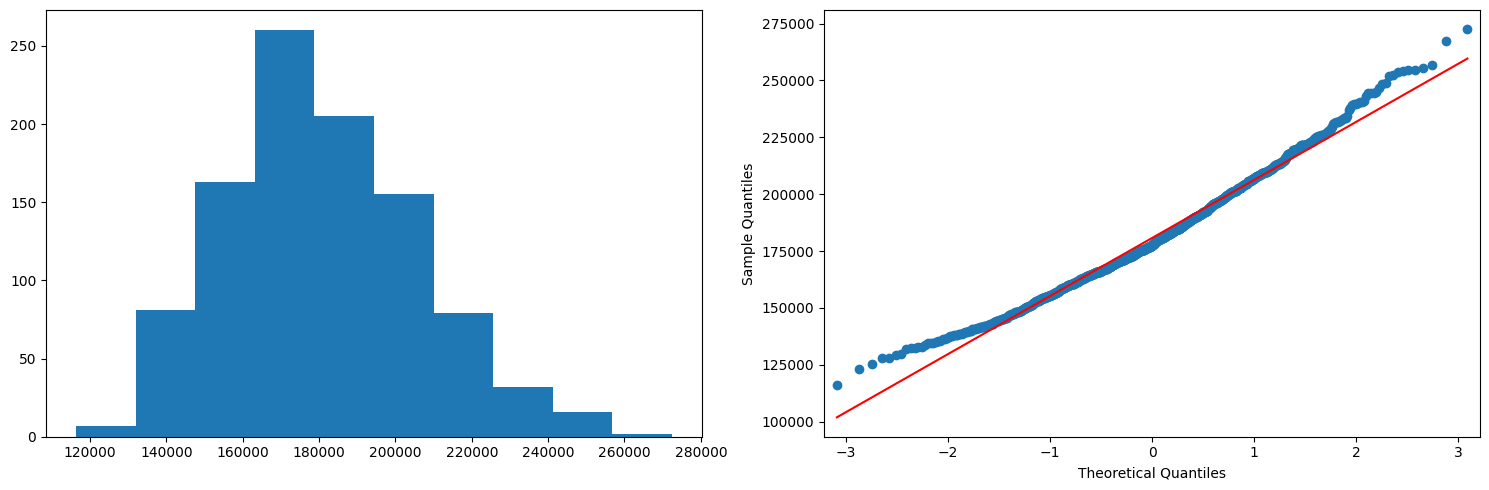

In [18]:
# Definimos una lista que guardará los datos
import statsmodels.api as sm
promedio_muestras = []
prices_df = datos['SalePrice'] # Extraemos los datos de precios
for i in range(1000): # cantidad de muestras
    muestra_i = prices_df.sample(10, # este es n
                                 random_state = i)
    # al definir el random_state como i, aseguramos no repetición de muestras
    promedio_i = np.mean(muestra_i)
    promedio_muestras.append(promedio_i)
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(promedio_muestras)

sm.qqplot(np.array(promedio_muestras), line='s', ax = ax[1])
fig.tight_layout()
plt.show()

Al ver los QQ-plots, a medida que las muestras se acercan a una distribución normal.

## Intervalos de Confianza

La estimación de un parámetro poblacional a partir de una estimación puntual contiene inherentes errores, sient estos dependientes del tamaño de la muestra. Los intervalos de confianza nos permiten entregar un rango de valores donde estimamos, con un cierto nivel de confianza, que el parámetro poblacional se encuentra en él.

In [19]:
import scipy.stats as st # permite obtener diferentes funciones importantes en estadística
data = prices_df = datos['SalePrice'] # Extraemos los datos de precios
# para el 95% de confianza utilizamos el siguiente procedimiento
def ci_95(data):
    '''
    Calcula el intervalo de 95% de confianza dado los datos
    '''
    mean_data = np.mean(data)
    se_data = st.sem(data) # calcula el SE de la media
    return [float(mean_data - se_data*2), float(mean_data + se_data*2)]
ci_95(data)

[177844.37087393083, 183747.74926258795]

Podemos también ver si es que al realizar la estimación de los intervalos de confianza para estimaciones muestrales, el valor real se encuentra dentro de dicho rango. Evaluemos que tan cierto es que siempre el estimador puntual de la población cae en el intervalo de confianza de un estimador muestral.

In [20]:
muestral_ci = pd.DataFrame(columns = ['mean_precio', 'se_precio', 'ci_inf', 'ci_sup', 'contiene_real'])
mean_poblacion = prices_df.mean()
# para el resultado de la clase se utilizaron 1000
for i in range(1000):
    muestra_i = prices_df.sample(50)
    mean_i = np.mean(muestra_i)
    se_i = np.std(prices_df)/np.sqrt(50)
    ci_95_i = ci_95(muestra_i)
    is_in = mean_poblacion <= ci_95_i[1] and mean_poblacion >= ci_95_i[0]
    muestral_ci.at[i, 'mean_precio'] = mean_i
    muestral_ci.at[i, 'se_precio'] = se_i
    muestral_ci.at[i, 'ci_inf'] = mean_i - 2 * se_i
    muestral_ci.at[i, 'ci_sup'] = mean_i + 2* se_i
    muestral_ci.at[i, 'contiene_real'] = is_in

display(muestral_ci.head(10))

print('El porcentaje de veces que el CI contiene el valor real:', muestral_ci['contiene_real'].astype(int).mean())

### Nota: el comando .astype(int) va a cambiar el tipo de dato que tiene ese dataframe o columna.
###       Entonces, en este caso como es una columna de datos booleanos (True or False) pasan a ser datos
###       numéricos. El mapeo de las variables booleanas a datos numéricos siempre es el mismo: True -> 1 y False -> 0

,mean_precio,se_precio,ci_inf,ci_sup,contiene_real
0,179208.5,11295.756281,156616.987437,201800.012563,True
1,199123.94,11295.756281,176532.427437,221715.452563,True
2,186839.66,11295.756281,164248.147437,209431.172563,True
3,185976.0,11295.756281,163384.487437,208567.512563,True
4,199316.46,11295.756281,176724.947437,221907.972563,True
5,181507.02,11295.756281,158915.507437,204098.532563,True
6,179433.32,11295.756281,156841.807437,202024.832563,True
7,188474.58,11295.756281,165883.067437,211066.092563,True
8,191328.84,11295.756281,168737.327437,213920.352563,True
9,213461.62,11295.756281,190870.107437,236053.132563,True


El porcentaje de veces que el CI contiene el valor real: 0.942


In [21]:
muestral_ci['contiene_real'].astype(int).mean()

np.float64(0.942)

Debido a que sabemos que las distribuciones muestrales, por el teorema del límite central se acercan a una distribución normal a medida que $n$ aumenta. Podemos realizar el análisis bajo la estadística de una distribución normal.

In [22]:
# calculamos el z-critico para un alpha 0.005
z_critico = st.norm.ppf(0.975) # 1 - alpha/2
z_critico

np.float64(1.959963984540054)

In [23]:
z_critico = st.norm.ppf(0.975) # 1-alpha/2
data = datos['SalePrice']
mean_poblacion = np.mean(data)
se_data = st.sem(data)
corte_inferior = mean_poblacion - z_critico * se_data
corte_superior = mean_poblacion + z_critico * se_data

print(f'Corte Inferior: {corte_inferior:.2f}')
print(f'Corte Superior: {corte_superior:.2f}')
print(f'Valor Población: {mean_poblacion}')

Corte Inferior: 177903.46
Corte Superior: 183688.66
Valor Población: 180796.0600682594


Ahora podemos evaluar el mismo procedimiento anterior desde este mismo punto de vista, y analizar como cambia la efectividad de los intervalos de confianza a medida que aumenta el $n$ de las muestras.

In [24]:
muestral_ci = pd.DataFrame(columns = ['mean_precio', 'se_precio', 'ci_inf', 'ci_sup', 'contiene_real'])
mean_poblacion = prices_df.mean()
# para el resultado de la clase se utilizaron 1000
z_crit = st.norm.ppf(0.975)
for i in range(100):
    muestra_i = prices_df.sample(200)
    mean_i = np.mean(muestra_i)
    se_i = st.sem(muestra_i)
    ci_inf = mean_i - z_crit * se_i
    ci_sup =  mean_i + z_crit * se_i
    is_in = ci_inf < mean_poblacion < ci_sup
    muestral_ci.at[i, 'mean_precio'] = mean_i
    muestral_ci.at[i, 'se_precio'] = se_i
    muestral_ci.at[i, 'ci_inf'] = ci_inf
    muestral_ci.at[i, 'ci_sup'] = ci_sup
    muestral_ci.at[i, 'contiene_real'] = is_in

display(muestral_ci.head(10))

print('El porcentaje de veces que el CI contiene el valor real:', muestral_ci['contiene_real'].astype(int).mean())

,mean_precio,se_precio,ci_inf,ci_sup,contiene_real
0,188239.985,6671.613371,175163.863074,201316.106926,True
1,176589.83,5932.737975,164961.87724,188217.78276,True
2,179367.58,5988.928725,167629.495393,191105.664607,True
3,179487.655,5713.345382,168289.70382,190685.60618,True
4,175385.585,5508.712377,164588.70714,186182.46286,True
5,172416.575,5214.78171,162195.790661,182637.359339,True
6,184015.505,5603.516687,173032.814108,194998.195892,True
7,173369.245,5308.277595,162965.212093,183773.277907,True
8,176146.055,5487.079453,165391.576892,186900.533108,True
9,180778.91,4879.313256,171215.631748,190342.188252,True


El porcentaje de veces que el CI contiene el valor real: 0.98


En particular, este procedimiento se puede simplificar usando python. Para esto `Scipy` es súper útil.

In [25]:
# definimos los datos
data = prices_df = datos['SalePrice']
# para el 95% de confianza utilizamos el siguiente procedimiento
# calculamos la media
mean_data = np.mean(data)
# calculamos el SE
se_data = st.sem(data)
# intervalos de confianza asumiento una distribución normal con media mean_data y std se_data
ci_95 = st.norm.interval(0.975, loc = mean_data, scale = se_data)
print(f'Corte Inferior: {ci_95[0]:.2f}')
print(f'Corte Superior: {ci_95[1]:.2f}')
print(f'Valor Población: {mean_poblacion}')

Corte Inferior: 177488.10
Corte Superior: 184104.02
Valor Población: 180796.0600682594


## Tamaño Muestral para el error de la Media

En este caso, queremos analizar cual es la cantidad de $n$ que debemos tener en nuestra muestra para que el error no sea superior a $E$ con un $100(1-\alpha)\%$ de confianza:
$$
 n = \left( \frac{z_{\alpha /2} \sigma}{E} \right)^2
$$


In [26]:
# definimos un error de 20.000

data = datos['SalePrice']
muestra_20 = prices_df.sample(20, random_state = 54)
E = 20000
sigma = 67800 # asumimos este valor como la desviación estándard de la población
z_critico = st.norm.ppf(0.975) # 1-alpha/2 es decir 0.05 de significancia
n = (z_critico * sigma / E)**2
print(f'Tamaño de la Muestra: {np.ceil(n):.0f}')

Tamaño de la Muestra: 45


Podemos probar ahora este intervalo de confianza.

In [27]:
n = np.ceil(n)

df_muestral_error = pd.DataFrame(columns = ['n', 'media_muestral', 'Error', 'MenorE'])

for i in range(1000): # cantidad de muestras
    muestra_i = prices_df.sample(np.ceil(n).astype(int), random_state = i)
    error = np.abs(np.mean(muestra_i) - mean_poblacion)
    menor_E = error < E
    df_muestral_error.at[i, 'n'] = n
    df_muestral_error.at[i, 'media_muestral'] = np.mean(muestra_i)
    df_muestral_error.at[i, 'Error'] = error
    df_muestral_error.at[i, 'MenorE'] = menor_E
display(df_muestral_error.head(10))
porcentaje = np.mean(df_muestral_error['MenorE'].astype(int))
print(f'Porcentaje de Errores menores a {E}: {porcentaje}')

,n,media_muestral,Error,MenorE
0,45.0,195321.066667,14525.006598,True
1,45.0,178081.666667,2714.393402,True
2,45.0,176450.222222,4345.837846,True
3,45.0,171166.444444,9629.615624,True
4,45.0,171677.555556,9118.504513,True
5,45.0,185223.622222,4427.562154,True
6,45.0,181916.4,1120.339932,True
7,45.0,188894.222222,8098.162154,True
8,45.0,168406.688889,12389.371179,True
9,45.0,166338.311111,14457.748957,True


Porcentaje de Errores menores a 20000: 0.923


Da cercano, pero no perfecto. ¿Por qué podría ser así?